## Spis treści:
* [1. Regresja linowa](#1.Regresja_liniowa)
* [2. Multiple regression](#2.Multiple_Regression)
* [3. Obserwacje nietypowe i odstające](#3.Obserwacje_nietypowe_i_odstające)
* [4. Regresja nieliniowa](#4.Regresja_nieliniowa)
* [5. Fisherowska dyskryminacja liniowa (LDA)](#5.Fisherowska_dyskryminacja_liniowa_(LDA))
* [6. Regresja logistyczna](#6.Regresja_logistyczna)
* [7. Dyskryminacja kwadratowa (QDA)](#7.Dyskryminacja_kwadratowa_QDA)
* [8. Drzewa decyzyjne](#8.Drzewa_decyzyjne)

# 1.Regresja_liniowa

### zczytywanie i ogólne sprawdzanie danych

In [1]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2018/02/drukarki.txt")
colnames(dane) = c("czas", "liczba")

#plot(dane$czas, dane$liczba, ylab = "liczba drukarek", xlab = "czas konserwacji [h]")
#hist(dane$czas, xlab = "czas konserwacji [h]", main = "")
#summary(dane$czas)

### model regresji liniowej

In [2]:
model_rl = lm(liczba ~ czas, data = dane)
summary(model_rl)


Call:
lm(formula = liczba ~ czas, data = dane)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6162 -0.7647  0.8591  2.2205  3.2848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.8142     1.2144    0.67    0.508    
czas          2.9505     0.2156   13.69 6.31e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.064 on 28 degrees of freedom
Multiple R-squared:   0.87,	Adjusted R-squared:  0.8653 
F-statistic: 187.3 on 1 and 28 DF,  p-value: 6.309e-14


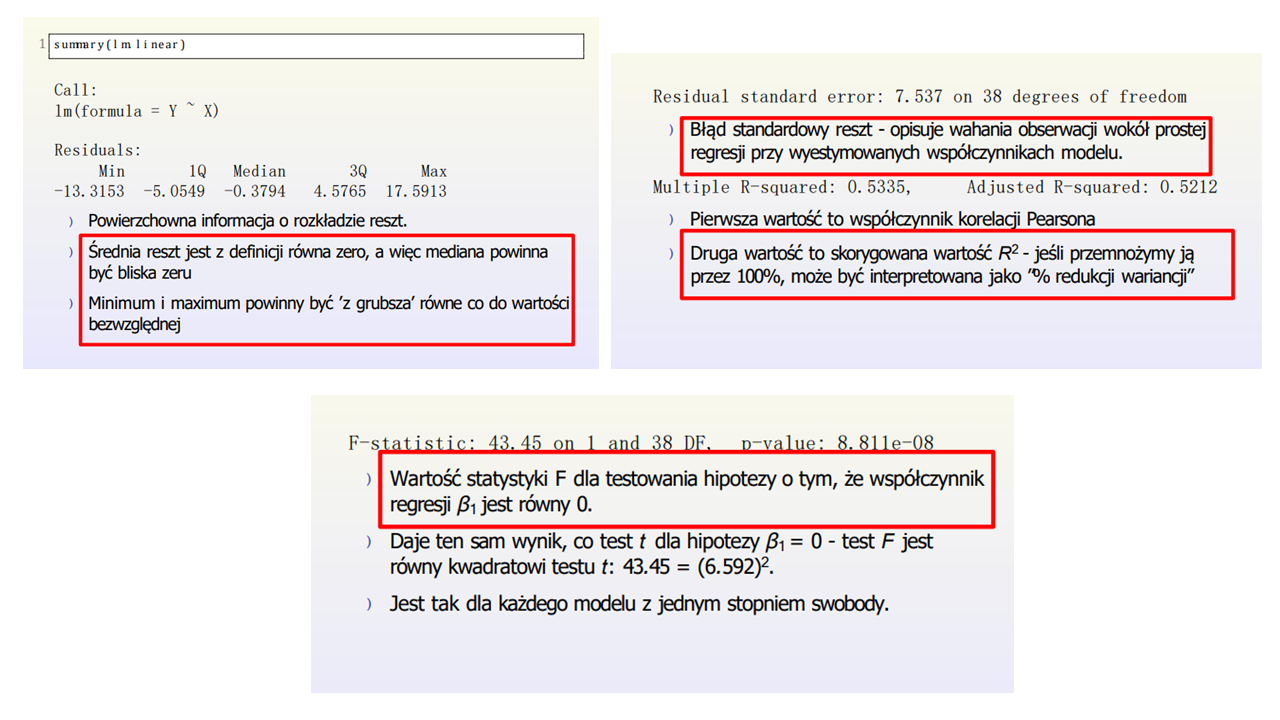

### sprawdzanie poprawności modelu

Sprawdzamy czy reszty mają rozkład normalny.


	Shapiro-Wilk normality test

data:  reszty
W = 0.84347, p-value = 0.0004539


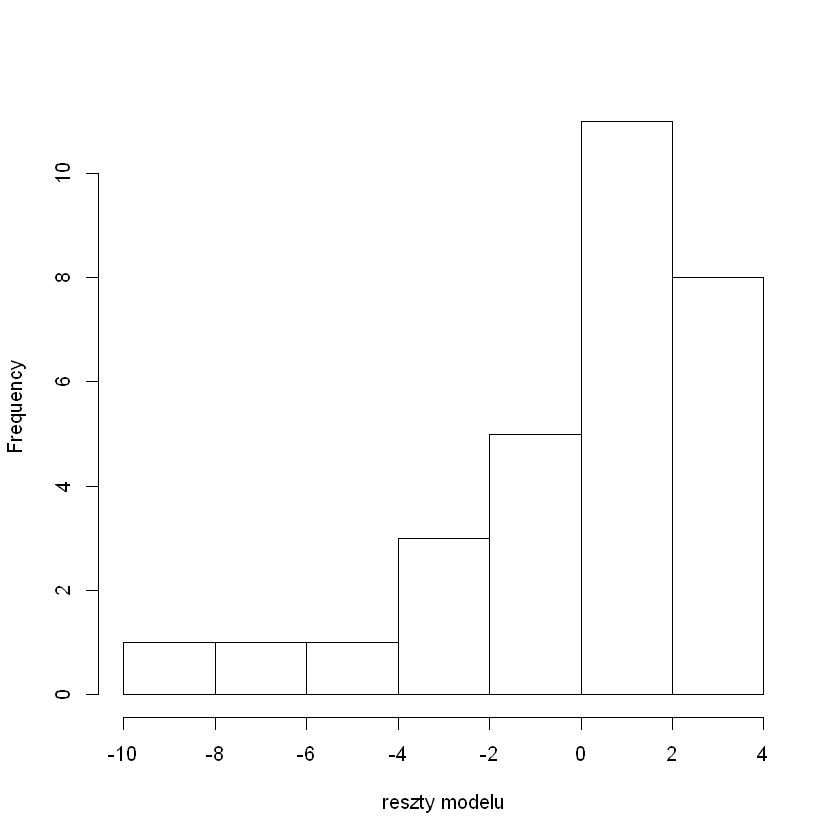

In [3]:
reszty = residuals(model_rl)
hist(reszty, xlab = "reszty modelu", main = "")
shapiro.test(reszty)

# reszty powinny mieć rozkład normalny, sprawdzamy to poprzez histogram oraz test Shapiro-Wilka

Dane wraz z prostą regresji.

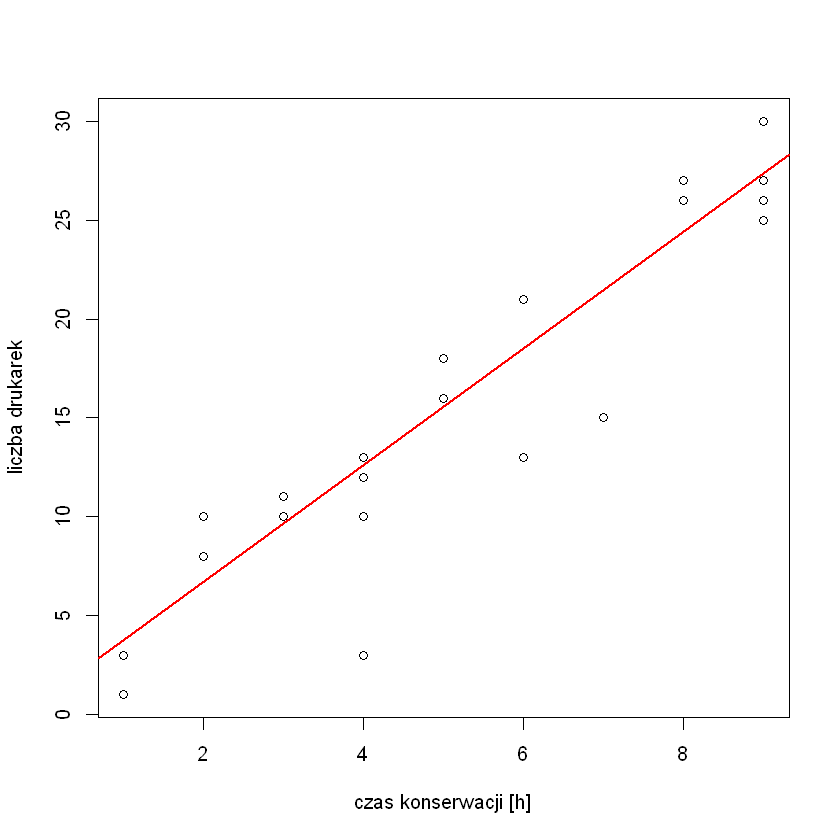

In [4]:
plot(dane$czas, dane$liczba, ylab = "liczba drukarek", xlab = "czas konserwacji [h]")
abline(model_rl, lwd = 2, col = "red")

Wykres kwantyl-kwantyl

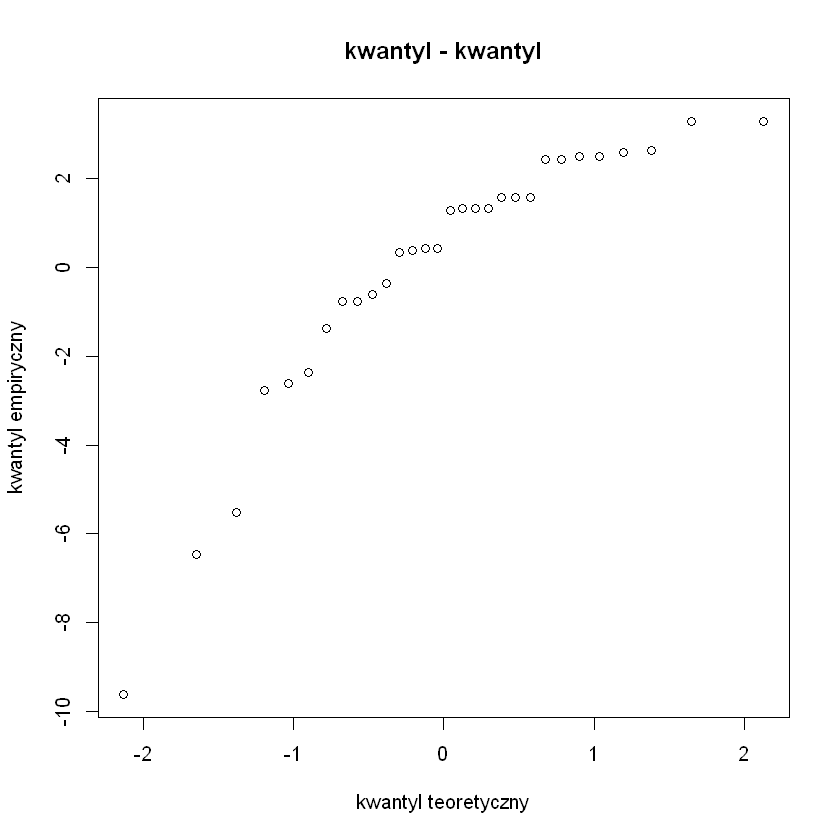

In [5]:
qqnorm(reszty, main = "kwantyl - kwantyl", xlab = "kwantyl teoretyczny", ylab = "kwantyl empiryczny")

# układ punktów 'na przekątnej' sugerowałby, że reszty pochodzą z rozkładu normalnego
# czyli, że spełniają założenie

Przedziały predykcyjne

Jeśli chcemy zrobić przedziały predykycyjne lub ufności to musimy nasz model zdefinować w następujący sposób, inaczej jest ryzyko błędu ze strony R.

In [6]:
model_rl2 = lm(liczba ~ unlist(czas), data = dane)
summary(model_rl2)


Call:
lm(formula = liczba ~ unlist(czas), data = dane)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6162 -0.7647  0.8591  2.2205  3.2848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.8142     1.2144    0.67    0.508    
unlist(czas)   2.9505     0.2156   13.69 6.31e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.064 on 28 degrees of freedom
Multiple R-squared:   0.87,	Adjusted R-squared:  0.8653 
F-statistic: 187.3 on 1 and 28 DF,  p-value: 6.309e-14


In [7]:
czas_konserwacji = data.frame(czas = 1:9)
# generujemy sobie sztuczne dane, na których będziemy wyznaczać przedziały predykcyjne i ufności

In [8]:
przedzial_p = predict(model_rl2, newdata = czas_konserwacji, int = "p")
przedzial_p

# int = 'p' ===> przedział predykcyjny
# by default jest to 95% przedział predykcyjny

fit       lwr        upr     
1  3.764686 -2.8554536 10.38483
2  6.715182  0.1989592 13.23140
3  9.665677  3.2247077 16.10665
4 12.616172  6.2207798 19.01156
5 15.566667  9.1865395 21.94679
6 18.517162 12.1217699 24.91255
7 21.467657 15.0266879 27.90863
8 24.418152 17.9019295 30.93437
9 27.368647 20.7485068 33.98879

Przedziały ufności

In [9]:
przedzial_u = predict(model_rl, newdata = czas_konserwacji, int = "c")
przedzial_u

# int = 'c' ==> przedział ufności

fit       lwr       upr      
1  3.764686  1.659139  5.870234
2  6.715182  4.963546  8.466817
3  9.665677  8.218902 11.112451
4 12.616172 11.388120 13.844224
5 15.566667 14.420762 16.712571
6 18.517162 17.289110 19.745214
7 21.467657 20.020883 22.914431
8 24.418152 22.666516 26.169788
9 27.368647 25.263100 29.474194

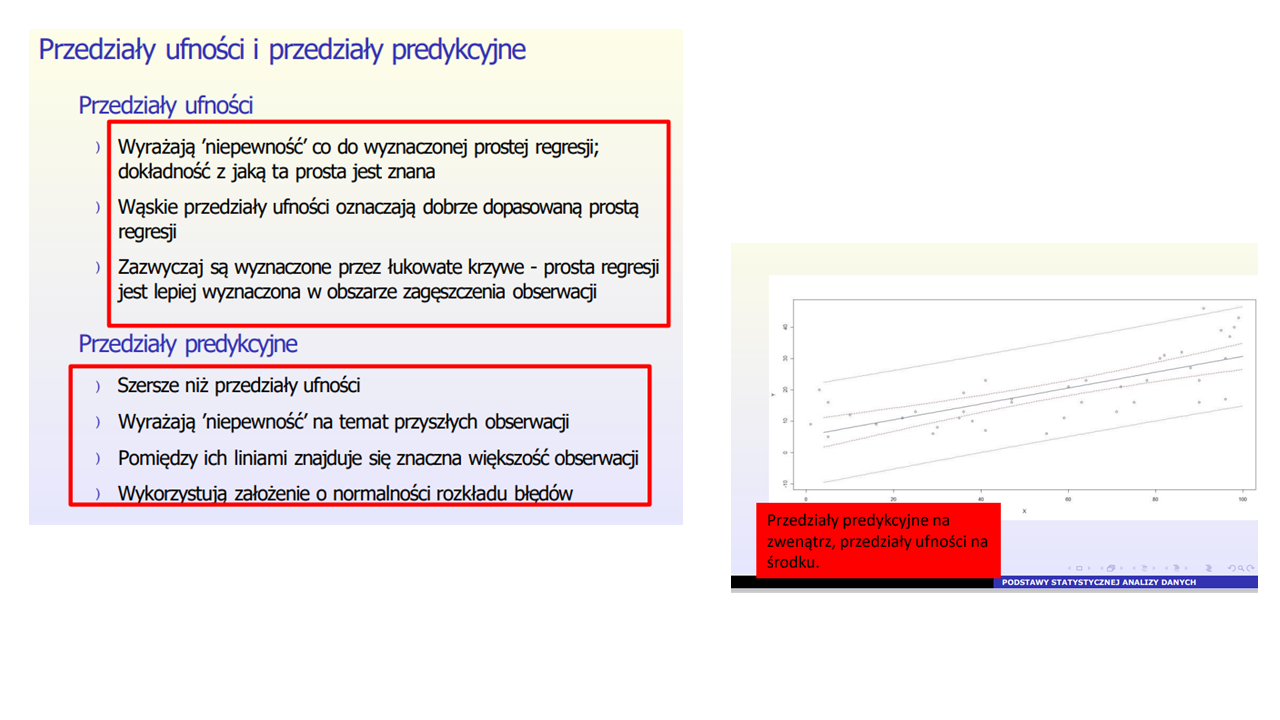

Wykres przedziałów ufności i predykcyjnych

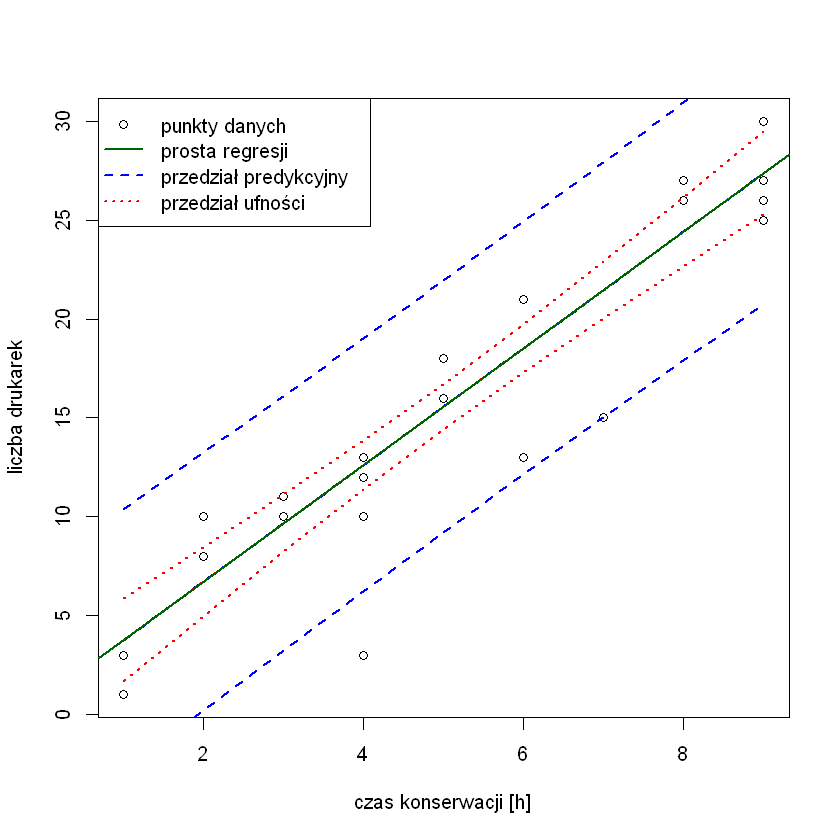

In [10]:
plot(dane$czas, dane$liczba, ylab = "liczba drukarek", xlab = "czas konserwacji [h]")
matlines(czas_konserwacji$czas, przedzial_u, col = "red", lty = 3, lwd = 2)
matlines(czas_konserwacji$czas, przedzial_p, col = "blue", lty = 2, lwd = 2)
abline(model_rl, lwd = 2, col = "darkgreen")
legend("topleft", c("punkty danych", "prosta regresji", "przedział predykcyjny", "przedział ufności"), 
      col = c("black", "darkgreen", "blue", "red"), lwd = c(1, 2, 2, 2), lty = c(NA, 1, 2, 3), pch = c(1, NA, NA, NA))

In [11]:
#Jaka jest dolna granica przedziału ufności dla trzeciej obserwacji?

przedzial_u2 = predict(model_rl, int = "c")  # robimy przedział ufności dla wszystkich danych
przedzial_u2
przedzial_u2[3, 2]  # outputu wybieramy trzeci wiersz i drugą kolumnę

fit       lwr       upr      
1  18.517162 17.289110 19.745214
2  27.368647 25.263100 29.474194
3  24.418152 22.666516 26.169788
4   9.665677  8.218902 11.112451
5  27.368647 25.263100 29.474194
6  18.517162 17.289110 19.745214
7   9.665677  8.218902 11.112451
8  15.566667 14.420762 16.712571
9   3.764686  1.659139  5.870234
10 27.368647 25.263100 29.474194
11  9.665677  8.218902 11.112451
12  3.764686  1.659139  5.870234
13 15.566667 14.420762 16.712571
14 15.566667 14.420762 16.712571
15 12.616172 11.388120 13.844224
16 24.418152 22.666516 26.169788
17  3.764686  1.659139  5.870234
18 12.616172 11.388120 13.844224
19 15.566667 14.420762 16.712571
20  9.665677  8.218902 11.112451
21 12.616172 11.388120 13.844224
22  6.715182  4.963546  8.466817
23 24.418152 22.666516 26.169788
24 27.368647 25.263100 29.474194
25 18.517162 17.289110 19.745214
26 24.418152 22.666516 26.169788
27  6.715182  4.963546  8.466817
28  6.715182  4.963546  8.466817
29 21.467657 20.020883 22.914431
30 12.616172 11.388120 13.844224

[1] 22.66652

Korelacja

In [12]:
cor(dane) # macierz korelacji

cor.test(dane$czas, dane$liczba, method = 'pearson')  # robi test na istotność współczynnika korelacji
#cor.test(dane$czas, dane$liczba, method = 'spearman')
#cor.test(dane$czas, dane$liczba, method = 'kendall')

# H0: współczynnik korelacji == 0
# H1: współczynnik korelacji != 0


korelacja = cor.test(dane$czas, dane$liczba)
str(korelacja)
korelacja$conf.int   # wybieramy conf.int i wiemy to z wywołąnia str(korelacja)

czas     liczba  
czas   1.000000 0.932713
liczba 0.932713 1.000000


	Pearson's product-moment correlation

data:  dane$czas and dane$liczba
t = 13.686, df = 28, p-value = 6.309e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8621502 0.9677809
sample estimates:
     cor 
0.932713 


List of 9
 $ statistic  : Named num 13.7
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named int 28
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 6.31e-14
 $ estimate   : Named num 0.933
  ..- attr(*, "names")= chr "cor"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "correlation"
 $ alternative: chr "two.sided"
 $ method     : chr "Pearson's product-moment correlation"
 $ data.name  : chr "dane$czas and dane$liczba"
 $ conf.int   : num [1:2] 0.862 0.968
  ..- attr(*, "conf.level")= num 0.95
 - attr(*, "class")= chr "htest"


[1] 0.8621502 0.9677809
attr(,"conf.level")
[1] 0.95

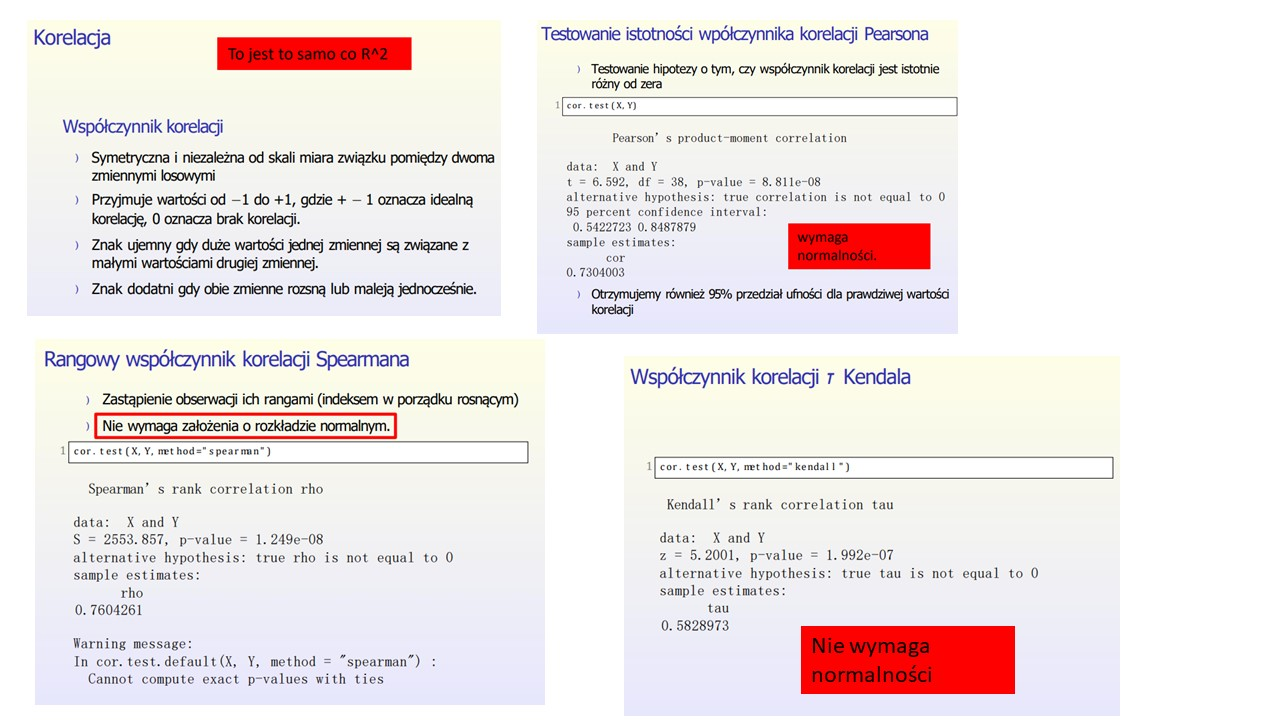

# 2.Multiple_Regression

### wczytywanie danych 

In [13]:
#install.packages('ISwR')
library(ISwR)
kfm$sex_recode <- unclass(kfm$sex)
#head(kfm)

Warning message:
"package 'ISwR' was built under R version 3.6.3"

### model regresji wielomianowej

In [14]:
MultiReg <- lm(dl.milk ~ sex_recode + ml.suppl + mat.weight + mat.height, data = kfm)
summary(MultiReg)


Call:
lm(formula = dl.milk ~ sex_recode + ml.suppl + mat.weight + mat.height, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49265 -0.89150  0.07478  0.63320  2.85558 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -8.564403   5.118139  -1.673   0.1012  
sex_recode  -0.756769   0.358408  -2.111   0.0403 *
ml.suppl    -0.001612   0.001440  -1.119   0.2691  
mat.weight   0.033686   0.026633   1.265   0.2124  
mat.height   0.091608   0.034855   2.628   0.0117 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.257 on 45 degrees of freedom
Multiple R-squared:  0.3652,	Adjusted R-squared:  0.3088 
F-statistic: 6.472 on 4 and 45 DF,  p-value: 0.0003343


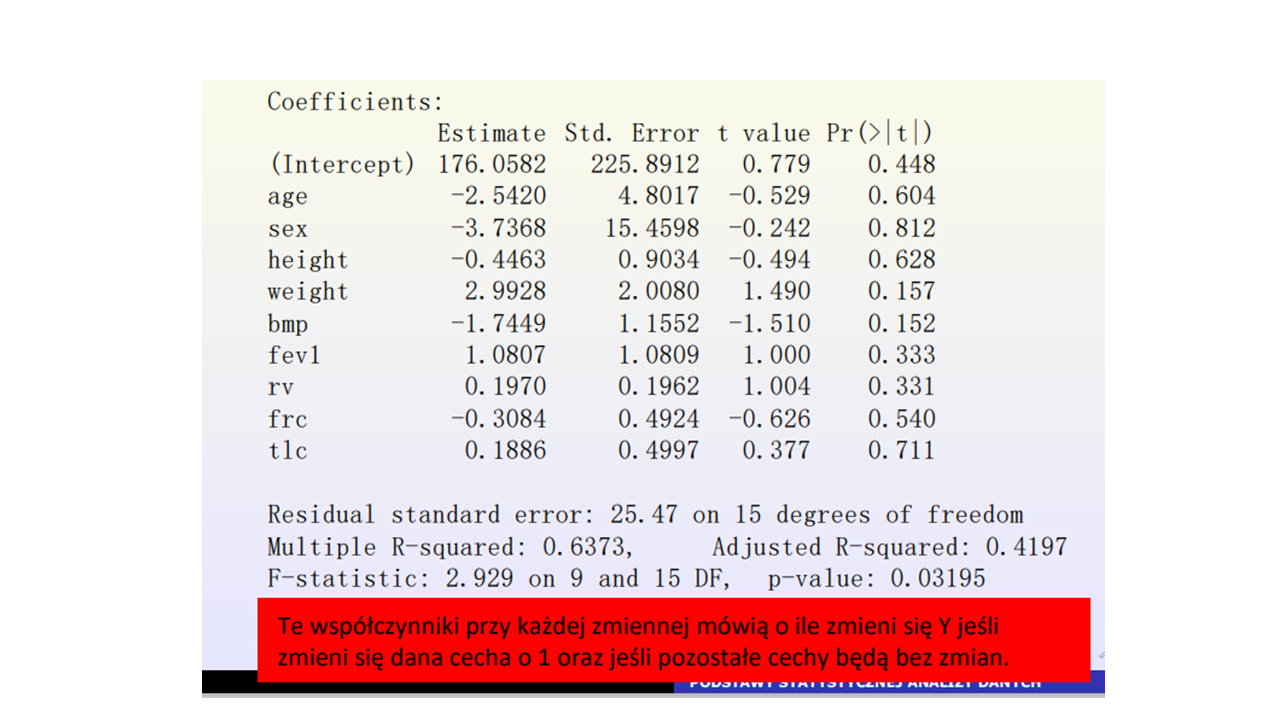

wykres parami

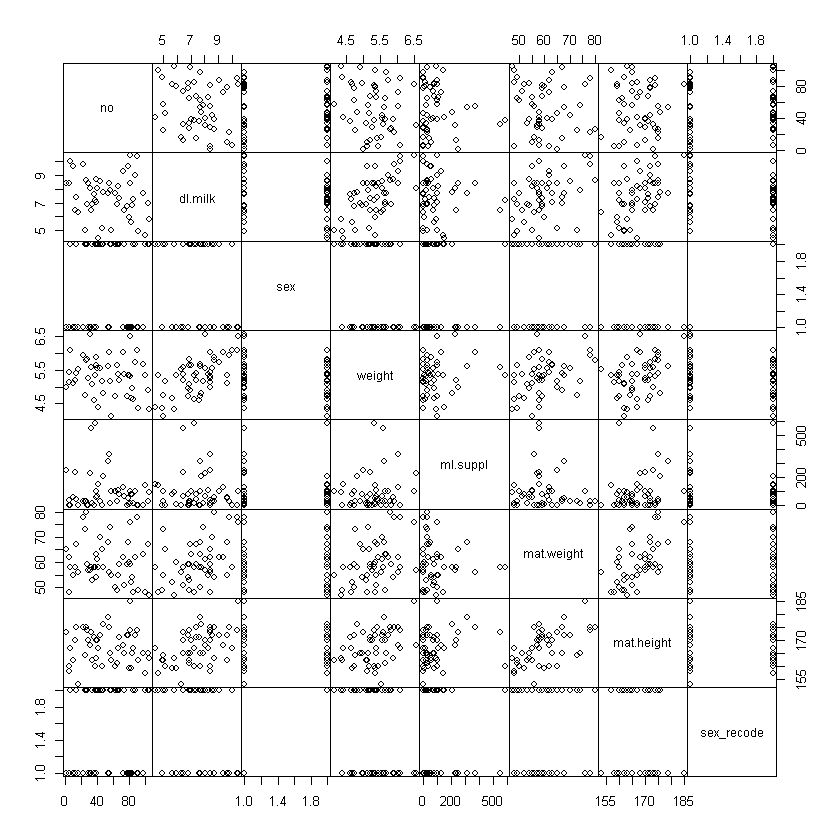

In [15]:
par(mex = 0.5)
pairs(kfm, gap = 0, cex.labels = 0.9)

macierz korelacji

In [16]:
kfm2 <- subset(kfm, select = -c(sex))
cor(kfm2, method = 'pearson')
# zastosowana korelacja Pearsona, ponieważ zakładamy, że dane pochodzą z rozkładu normalnego

no          dl.milk     weight     ml.suppl    mat.weight 
no          1.00000000 -0.18068364 -0.1649280 -0.12978958 -0.13731160
dl.milk    -0.18068364  1.00000000  0.6360448 -0.06351955  0.43427002
weight     -0.16492803  0.63604482  1.0000000  0.12838120  0.40817476
ml.suppl   -0.12978958 -0.06351955  0.1283812  1.00000000 -0.07887363
mat.weight -0.13731160  0.43427002  0.4081748 -0.07887363  1.00000000
mat.height -0.02356765  0.50504203  0.3867571  0.18230263  0.56473304
sex_recode  0.06193530 -0.29940126 -0.2200106 -0.07136717 -0.05303191
           mat.height  sex_recode 
no         -0.02356765  0.06193530
dl.milk     0.50504203 -0.29940126
weight      0.38675714 -0.22001058
ml.suppl    0.18230263 -0.07136717
mat.weight  0.56473304 -0.05303191
mat.height  1.00000000 -0.11776734
sex_recode -0.11776734  1.00000000

### krokowy wybór najlepszego modelu

Zaczniemy od modelu pełnego i następnie będziemy usuwać nieistotne zmienne (o p-value > 0.05)

In [17]:
full_model <- lm(dl.milk ~ sex_recode + ml.suppl + mat.weight + mat.height, data = kfm)
summary(full_model)


Call:
lm(formula = dl.milk ~ sex_recode + ml.suppl + mat.weight + mat.height, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49265 -0.89150  0.07478  0.63320  2.85558 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -8.564403   5.118139  -1.673   0.1012  
sex_recode  -0.756769   0.358408  -2.111   0.0403 *
ml.suppl    -0.001612   0.001440  -1.119   0.2691  
mat.weight   0.033686   0.026633   1.265   0.2124  
mat.height   0.091608   0.034855   2.628   0.0117 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.257 on 45 degrees of freedom
Multiple R-squared:  0.3652,	Adjusted R-squared:  0.3088 
F-statistic: 6.472 on 4 and 45 DF,  p-value: 0.0003343


In [18]:
model2 <- lm(dl.milk ~ sex_recode + mat.height, data = kfm)
summary(model2)


Call:
lm(formula = dl.milk ~ sex_recode + mat.height, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65175 -0.93119  0.05787  1.02587  2.93825 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.89856    4.82354  -2.052 0.045750 *  
sex_recode  -0.72810    0.36423  -1.999 0.051408 .  
mat.height   0.11046    0.02822   3.914 0.000292 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.279 on 47 degrees of freedom
Multiple R-squared:  0.3134,	Adjusted R-squared:  0.2842 
F-statistic: 10.73 on 2 and 47 DF,  p-value: 0.0001452


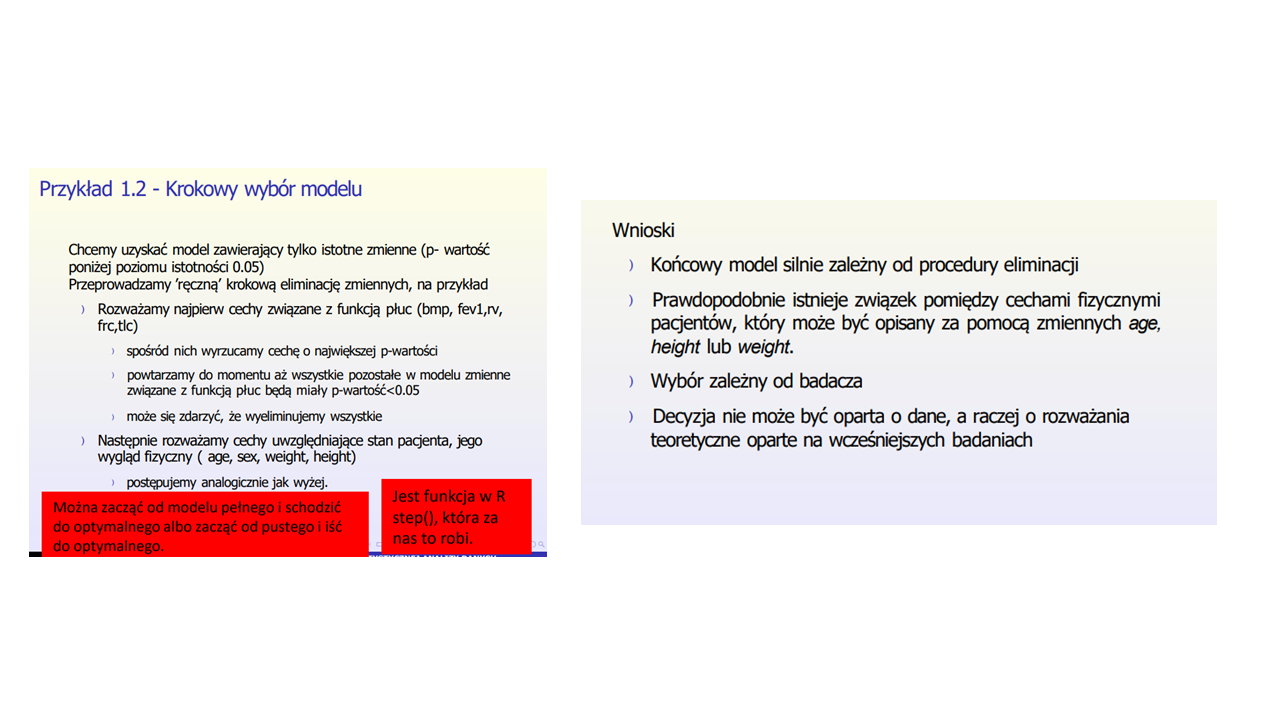

# 3.Obserwacje_nietypowe_i_odstające

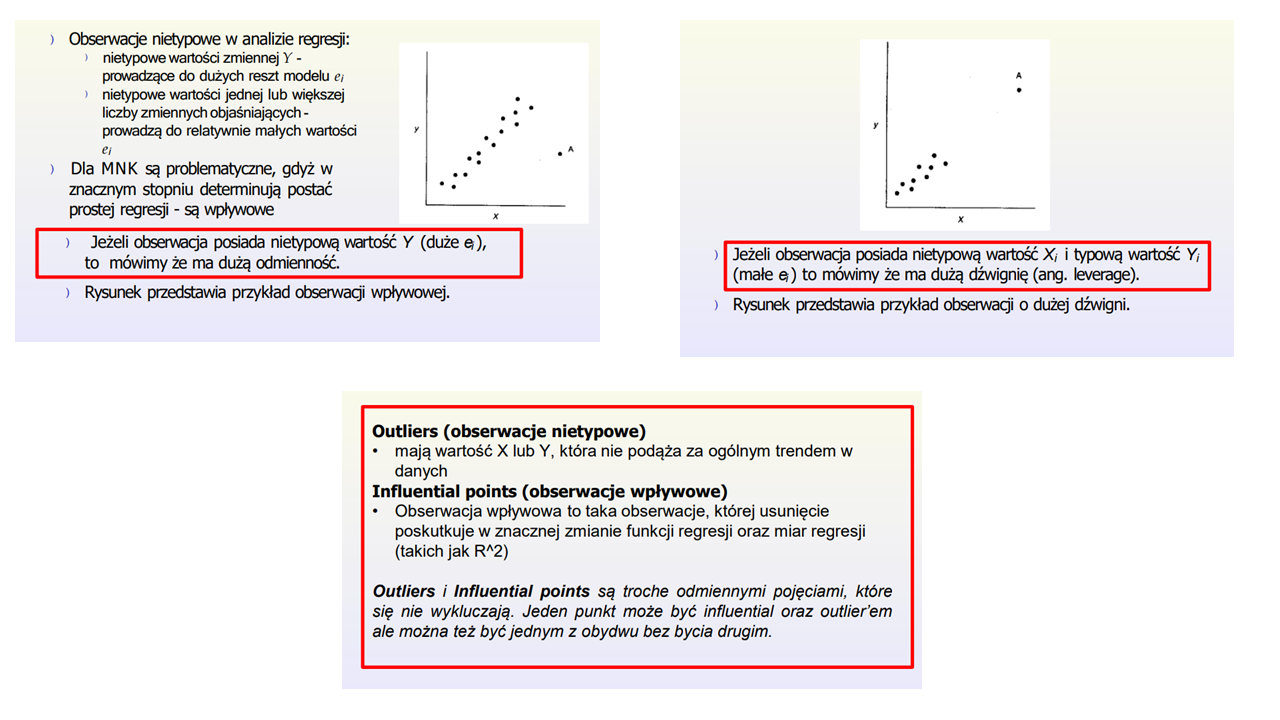

### graficzne szukanie obserwacji nietypowych (outlierów)

In [19]:
data(stackloss)
attach(stackloss)  # możemy pisac 'zmienna' zamiast 'dane$zmienna'
model = lm(stack.loss~Air.Flow)

The following object is masked _by_ .GlobalEnv:

    stack.loss

The following object is masked from package:datasets:

    stack.loss



[1] 21


Call:
lm(formula = stack.loss[-punkt_o_duzej_dzwigni] ~ Air.Flow[-punkt_o_duzej_dzwigni])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5084 -1.9014 -0.2049  1.3801  8.0986 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -48.18928    4.40791  -10.93 2.23e-09 ***
Air.Flow[-punkt_o_duzej_dzwigni]   1.09824    0.07273   15.10 1.15e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.895 on 18 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9228 
F-statistic:   228 on 1 and 18 DF,  p-value: 1.153e-11


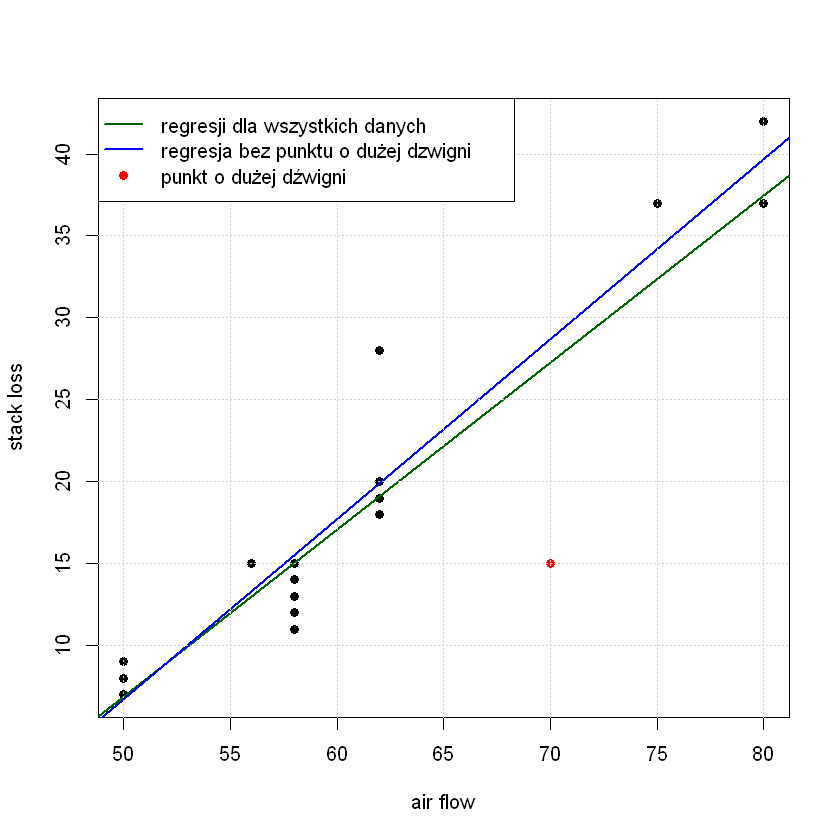

In [20]:
# graficzne szukanie outlierów

plot(Air.Flow, stack.loss, ylab = "stack loss", xlab = "air flow", pch = 19)
abline(model, col = "darkgreen", lwd = 2)
(punkt_o_duzej_dzwigni = which(Air.Flow == 70))
model2 = lm(stack.loss[-punkt_o_duzej_dzwigni]~Air.Flow[-punkt_o_duzej_dzwigni])
summary(model2)
abline(model2, col = "blue", lwd = 2)
points(Air.Flow[punkt_o_duzej_dzwigni], stack.loss[punkt_o_duzej_dzwigni], col = "red", pch = 19)
grid()
legend("topleft", c("regresji dla wszystkich danych", 
                    "regresja bez punktu o dużej dzwigni", "punkt o dużej dźwigni"), col = c("darkgreen", "blue", "red"),
                    lty = c(1, 1, NA), pch = c(NA, NA, 19), lwd = c(2, 2, NA))

### szukanie obserwacji nietypowych na bazie reszt studentyzowanych

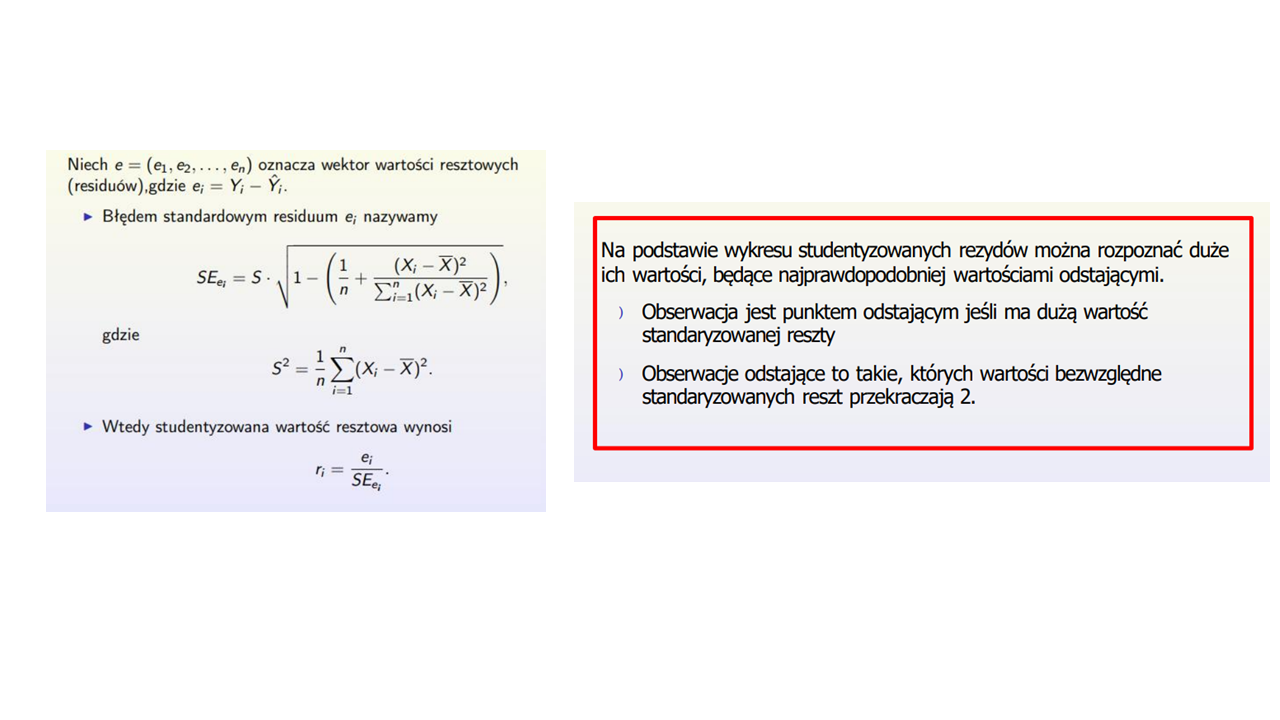

In [21]:
reszty_stud = rstudent(model)
summary(reszty_stud)


# sprawdzamy, które obserwacje mają reszty studenyzowane co do modułu większe niż dwa
# liczbowe szukanie outlierów
k = which(abs(reszty_stud) > 2)
k

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.47933 -0.27510 -0.01120 -0.03758  0.28208  2.51116 

4 21 
 4 21

### szukanie obserwacji nietypowych na podstawie outlier test

In [22]:
#install.packages("car")
library(car)
outlierTest(model)

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

    rstudent unadjusted p-value Bonferroni p
21 -4.479329         0.00028992    0.0060884

### szukanie obserwacji nietypowych na podstawie odległości Cook'a (influence plot i influence measures)

Warning message in plot.window(...):
"'id.method' nie jest parametrem graficznym"Warning message in plot.window(...):
"'id.n' nie jest parametrem graficznym"Warning message in plot.window(...):
"'id.cex' nie jest parametrem graficznym"Warning message in plot.xy(xy, type, ...):
"'id.method' nie jest parametrem graficznym"Warning message in plot.xy(xy, type, ...):
"'id.n' nie jest parametrem graficznym"Warning message in plot.xy(xy, type, ...):
"'id.cex' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.method' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.n' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.cex' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):
"'id.method' nie jest parametrem graficznym"Warning message in axis(side = side, at = at, labels = labels, ...):

StudRes   Hat        CookD      
1   1.316792 0.27546454 0.317358611
2  -0.137550 0.27546454 0.003792471
4   2.511161 0.04908792 0.127231549
21 -4.479329 0.10211308 0.569495586

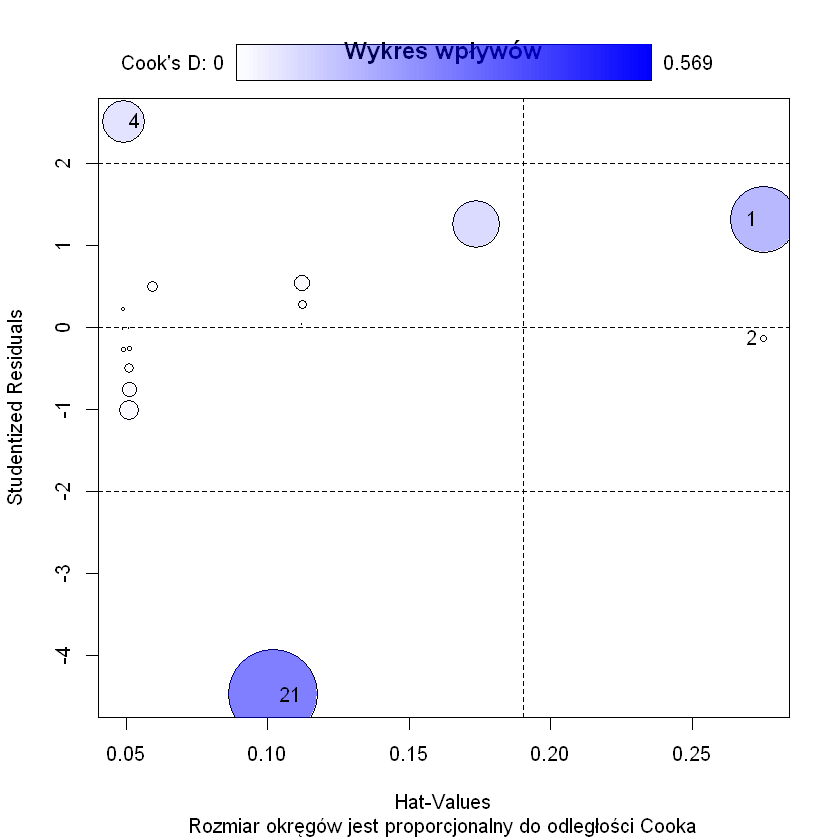

In [23]:
influencePlot (model, id.method = "identify", id.n = 1, id.cex = 1 , main = "Wykres wpływów",
               sub = "Rozmiar okręgów jest proporcjonalny do odległości Cooka")

In [24]:
influence.measures(model)

Influence measures of
	 lm(formula = stack.loss ~ Air.Flow) :

      dfb.1_  dfb.Ar.F    dffit cov.r   cook.d    hat inf
1  -0.681019  0.738427  0.81193 1.279 3.17e-01 0.2755    
2   0.071138 -0.077135 -0.08481 1.535 3.79e-03 0.2755   *
3  -0.441638  0.491101  0.57629 1.140 1.61e-01 0.1739    
4  -0.015324  0.098695  0.57055 0.643 1.27e-01 0.0491   *
5   0.001679 -0.010812 -0.06250 1.162 2.05e-03 0.0491    
6   0.001679 -0.010812 -0.06250 1.162 2.05e-03 0.0491    
7   0.000189 -0.001217 -0.00704 1.172 2.61e-05 0.0491    
8  -0.001299  0.008366  0.04836 1.166 1.23e-03 0.0491    
9  -0.001041  0.000681 -0.00260 1.174 3.56e-06 0.0511    
10 -0.023749  0.015534 -0.05930 1.166 1.85e-03 0.0511    
11 -0.023749  0.015534 -0.05930 1.166 1.85e-03 0.0511    
12 -0.046695  0.030543 -0.11660 1.142 7.08e-03 0.0511    
13 -0.094286  0.061672 -0.23543 1.051 2.77e-02 0.0511    
14 -0.070119  0.045865 -0.17509 1.103 1.57e-02 0.0511    
15  0.084897 -0.076149  0.10033 1.244 5.29e-03 0.1123    
16  0.008

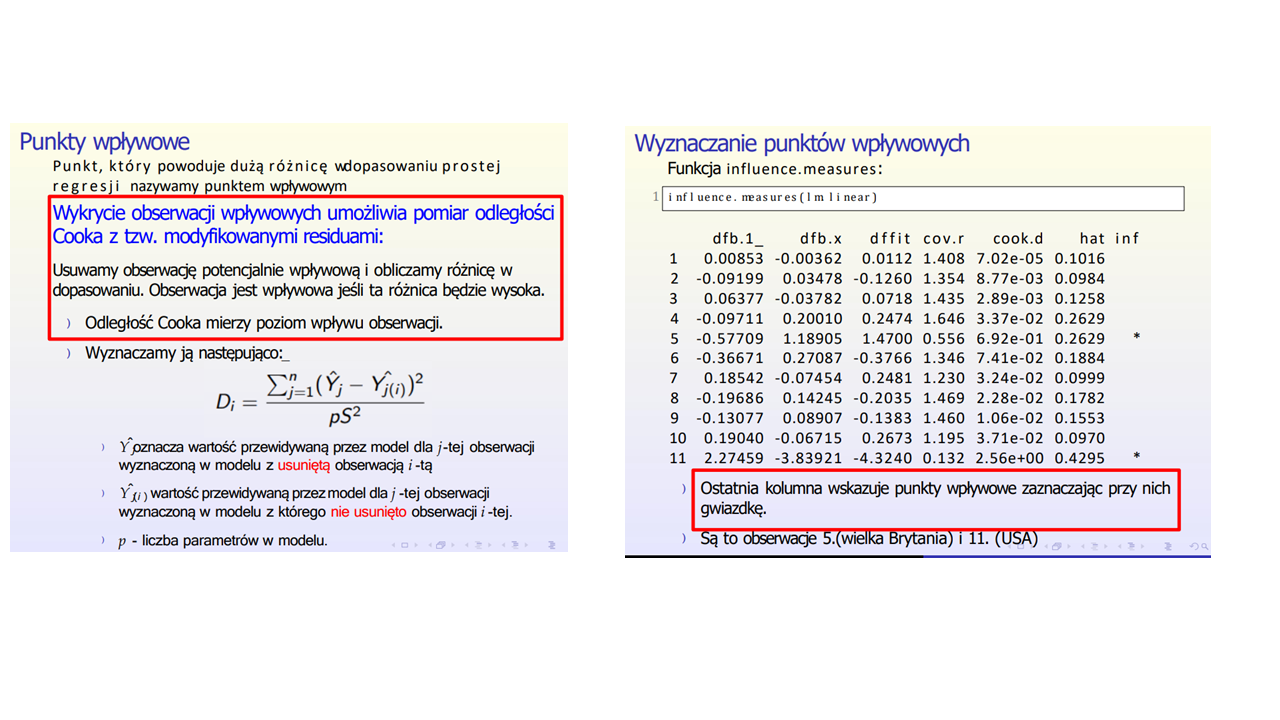

### model po odrzuceniu obserwacji nietypowych

In [25]:
model_final = lm(stack.loss[-c(2, 4, 21)]~Air.Flow[-c(2, 4, 21)])
summary(model_final)


Call:
lm(formula = stack.loss[-c(2, 4, 21)] ~ Air.Flow[-c(2, 4, 21)])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1879 -1.5614  0.0631  1.8082  2.8082 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -50.03382    3.80009  -13.17 5.31e-10 ***
Air.Flow[-c(2, 4, 21)]   1.12451    0.06412   17.54 7.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.176 on 16 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9475 
F-statistic: 307.6 on 1 and 16 DF,  p-value: 7.181e-12


# 4.Regresja_nieliniowa

### wstępna inspekcja danych

Warning message:
"package 'data.table' was built under R version 3.6.3"

V1 V2        
1 15  5.2541984
2 30  6.7132842
3 30 11.2666779
4  4  0.6183255
5 26  1.7986432
6 21  6.1584493

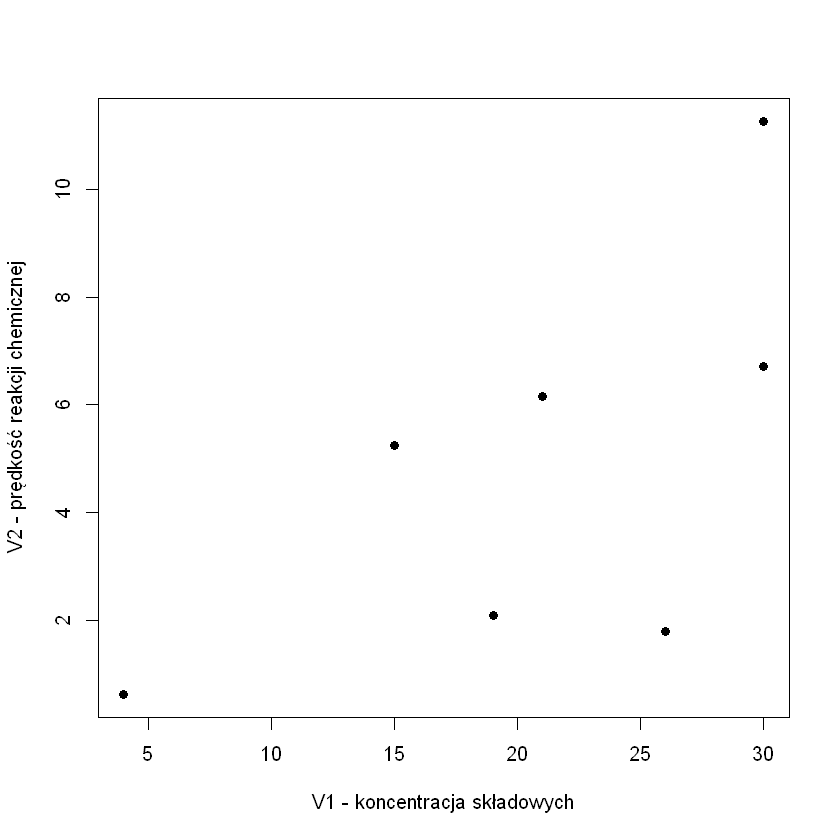

In [26]:
library(data.table)
react <- fread('http://theta.edu.pl/wp-content/uploads/2018/03/DANE_predkosc_reakcji.txt')
head(react)

plot(react$V1, react$V2, ylab = "V2 - prędkość reakcji chemicznej", xlab = "V1 - koncentracja składowych", pch = 19)

# zależność nie ma charakteru liniowego

### transformacja logarytmiczna

Można transformować zmienną zależną, zmienną niezależną lub obie zmiennie. Generalnie chcemy poprzez transformacje uzyskać liniową zależność między zmiennymi.

NULL

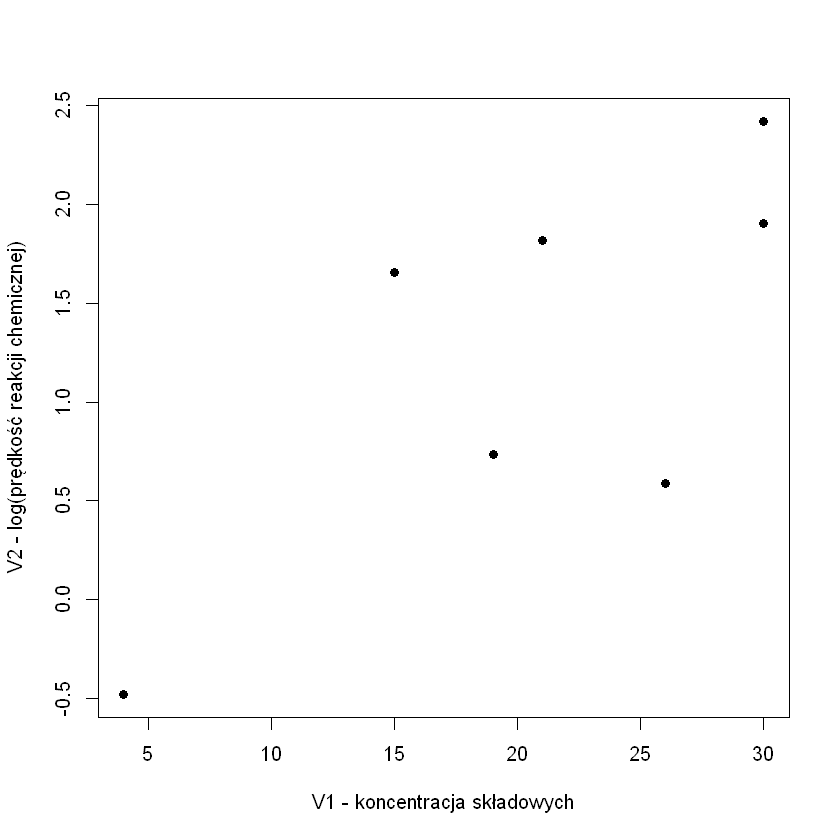

In [27]:
predkosc_log <- plot(react$V1, log(react$V2), ylab = "V2 - log(prędkość reakcji chemicznej)", xlab = "V1 - koncentracja składowych", pch = 19)

predkosc_log

### regresja wielomianowa

In [28]:
model_multi <- lm(V2 ~ V1 + I(V1^2), data = react)
summary(model_multi)


Call:
lm(formula = V2 ~ V1 + I(V1^2), data = react)

Residuals:
      1       2       3       4       5       6       7 
 2.4286 -1.0292  3.5242 -0.6036 -4.3247  1.7441 -1.7393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.05881    5.13655   0.206    0.847
V1           0.01278    0.62297   0.021    0.985
I(V1^2)      0.00700    0.01711   0.409    0.703

Residual standard error: 3.336 on 4 degrees of freedom
Multiple R-squared:  0.4529,	Adjusted R-squared:  0.1794 
F-statistic: 1.656 on 2 and 4 DF,  p-value: 0.2993


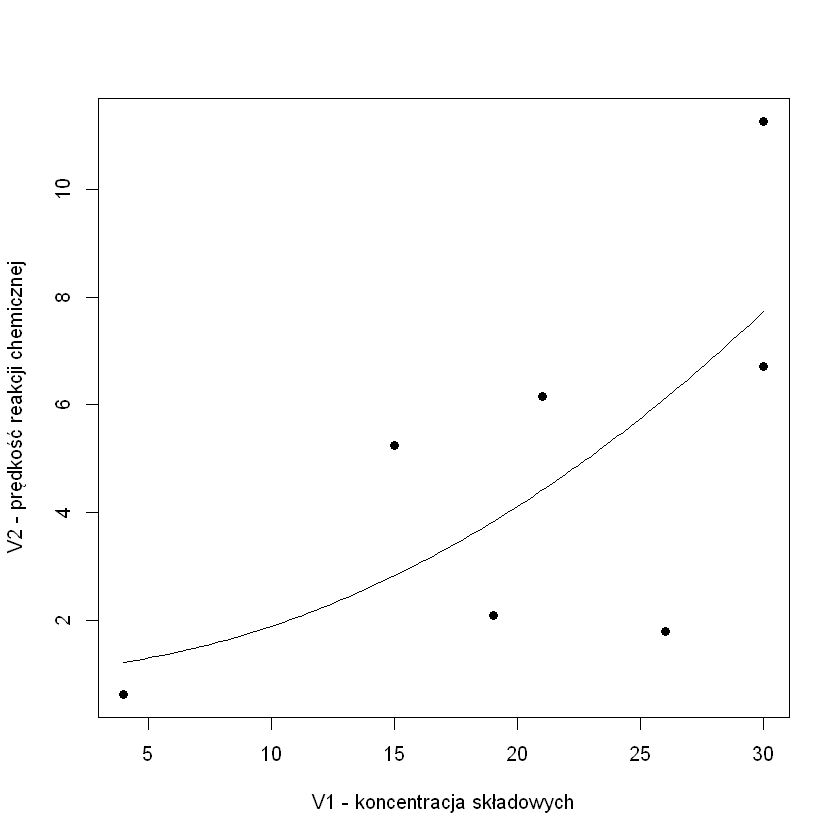

In [29]:
plot(react$V1, react$V2, ylab = "V2 - prędkość reakcji chemicznej", xlab = "V1 - koncentracja składowych", pch = 19)

curve(1.05881 + 0.01278*x + 0.00700*x^2, add = T)

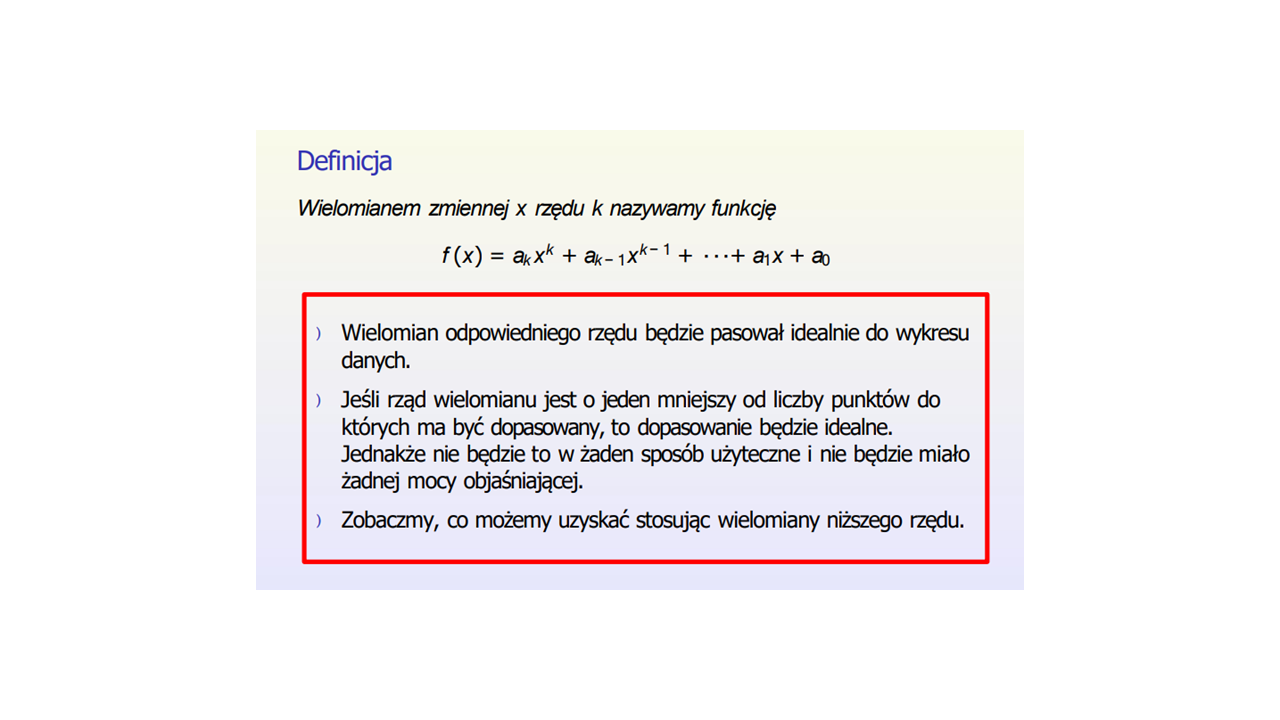

Warto jest zobaczyć, czy po transformacji rozkład residuals jest losowy (jeśli jest losowy to jest dobrze).

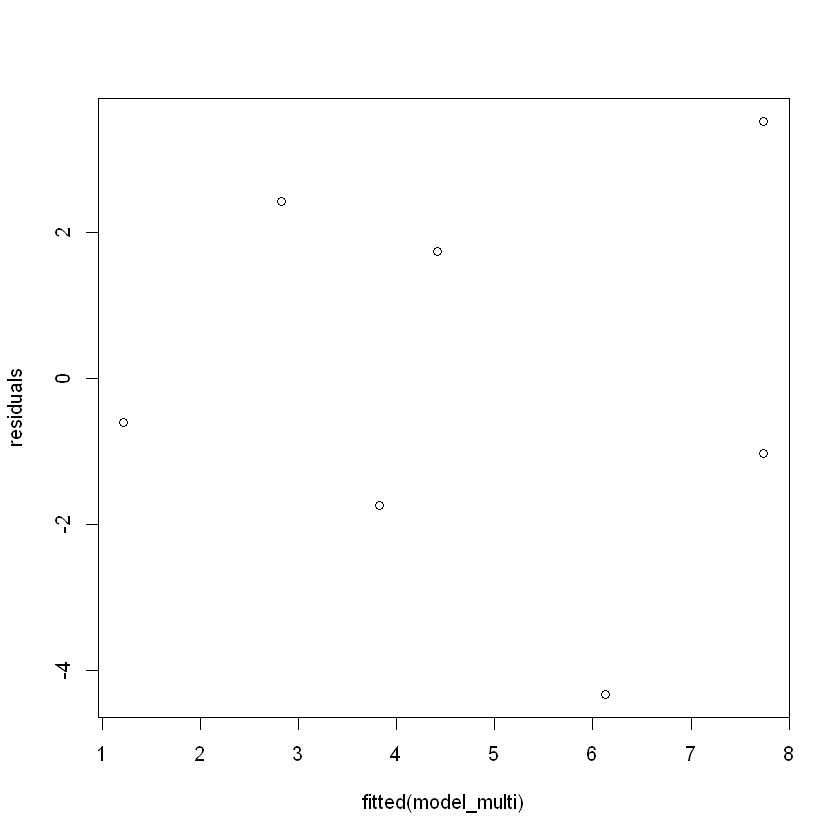

In [30]:
residuals <- resid(model_multi)
plot(fitted(model_multi), residuals)

# 5.Fisherowska_dyskryminacja_liniowa_(LDA)

### wczytywanie danych

In [31]:
kosiarki = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/dane_kosiarki-1.txt", header = TRUE)
head(kosiarki)

income lotsize owner
1 20.0    9.2    1    
2 28.5    8.4    1    
3 21.6   10.8    1    
4 20.5   10.4    1    
5 29.0   11.8    1    
6 36.7    9.6    1

### 'ręczne' przeprowadzanie LDA

In [32]:
kosiarki1 = kosiarki[kosiarki$owner == 1, 1:2] # posiadają kosiarki
kosiarki2 = kosiarki[kosiarki$owner == 2, 1:2] # nie posiadają kosiarki

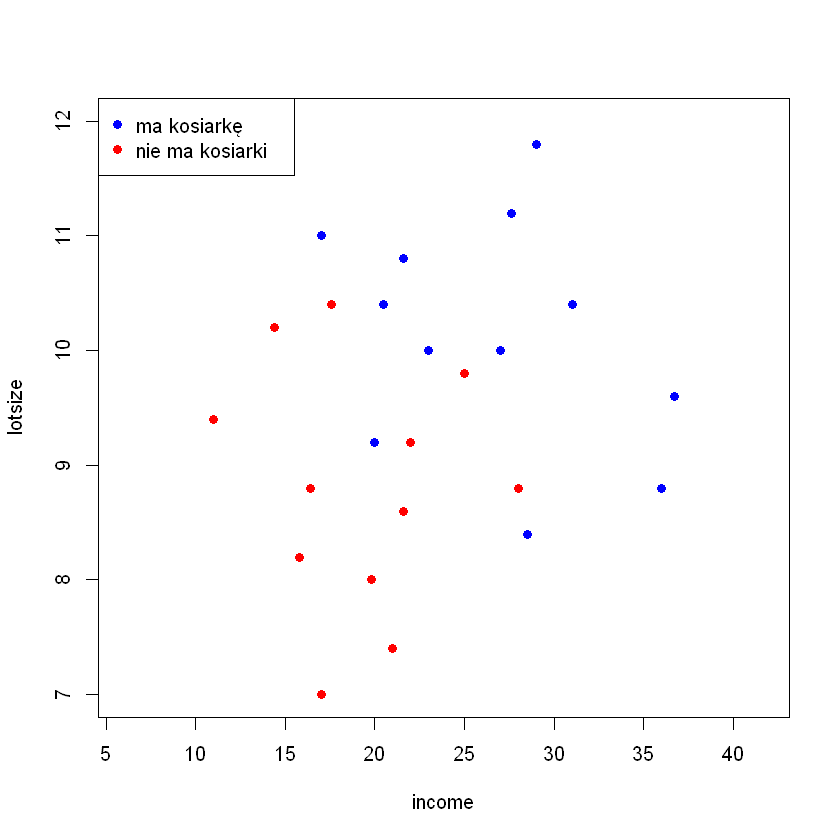

In [33]:
# rysujemy sobie dane

min_income = min(kosiarki1$income, kosiarki2$income)
max_income = max(kosiarki1$income, kosiarki2$income)
min_lotsize = min(kosiarki1$lotsize, kosiarki2$lotsize)
max_lotsize = min(kosiarki1$lotsize, kosiarki2$lotsize)
plot(kosiarki1$income, kosiarki1$lotsize, col = "blue", pch = 19, xlab = "income", ylab = "lotsize", 
     xlim = c(min_income-5, max_income+5), ylim = c(min_lotsize, max_lotsize+5))
points(kosiarki2$income, kosiarki2$lotsize, col = "red", pch = 19)
legend("topleft", c("ma kosiarkę", "nie ma kosiarki"), col = c("blue", "red"), pch = 19)

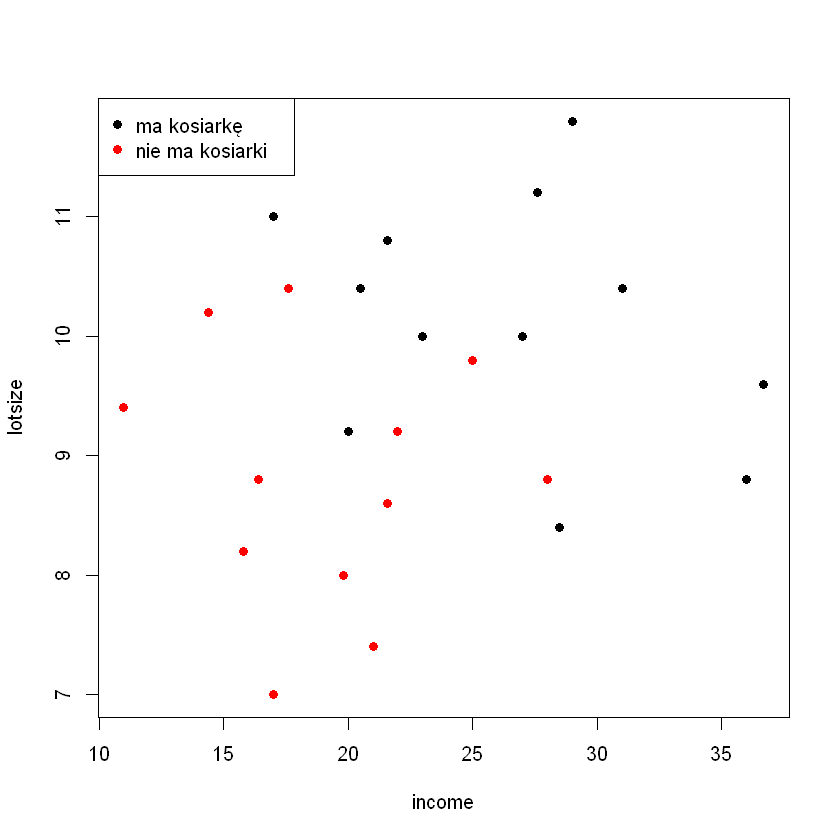

In [34]:
# inny sposób rysowania wykresu

plot(kosiarki$income, kosiarki$lotsize, col = kosiarki$owner, pch = 19, xlab = "income", ylab = "lotsize")
legend("topleft", c("ma kosiarkę", "nie ma kosiarki"), col = c(1, 2), pch = 19)

In [35]:
# wyznaczanie niezbędnych parametrów

# średnie
# specjalna funkcja, liczy średnią osobno dla każdej kolumny
x1 = colMeans(kosiarki1) 
x2 = colMeans(kosiarki2)

# macierze kowariancji
# kowariancja to nie to samo co korelacja
s1 = cov(kosiarki1)
s2 = cov(kosiarki2)

n1 = nrow(kosiarki1)
n2 = nrow(kosiarki2)

n = n1+n2

# macierz W (próbkowa macierz kowariancji)
W = 1 / (n-2)*((n1-1)*s1 + (n2-1)*s2)
W

income    lotsize  
income  30.741629 -1.200606
lotsize -1.200606  1.068333

In [36]:
# liczenie macierzy odwrotnej
# można obliczyć odwrotność tylko tych macierzy, których det() > 0

invW = solve(W)

In [37]:
# wyznaczanie współczynników najlepszej prostej dyskryminacjynej

a = t(x1 - x2) %*% invW
a
b = t(x1 - x2) %*% invW %*% (x1 + x2) / 2
b

# UWAGA a i b to jestsze nie są współczynniki (y = ax + b)

income    lotsize 
[1,] 0.3006909 1.570369

[,1]    
[1,] 21.73876

In [38]:
a_new = -a[1] / a[2]
b_new = b / a[2]
a_new
b_new

# to już są faktyczne współczynniki z równania y = ax + b

[1] -0.1914778

[,1]    
[1,] 13.84309

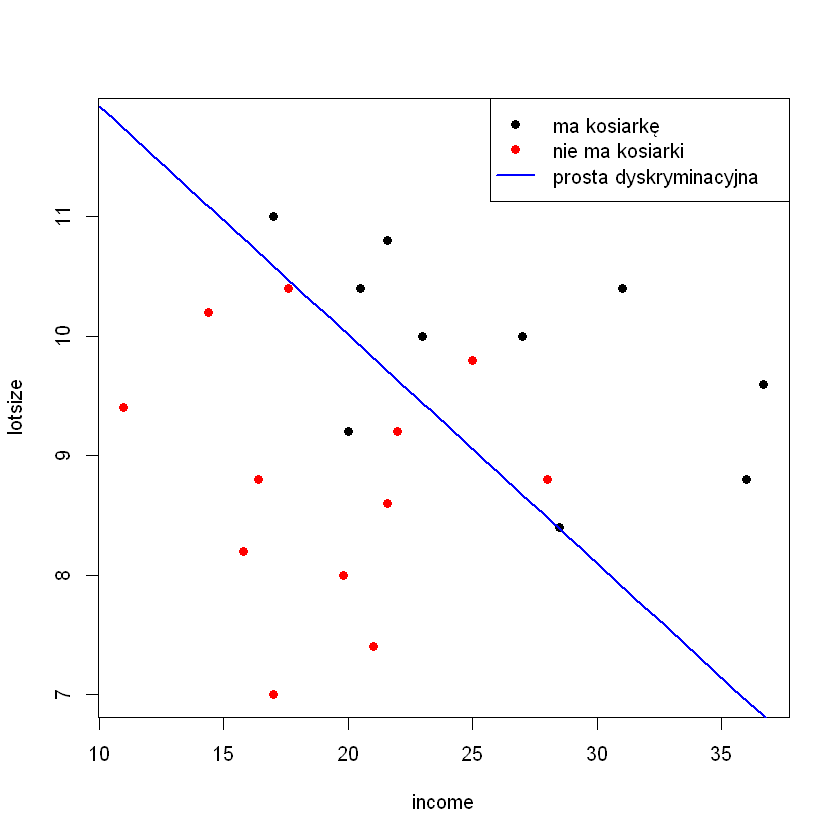

In [39]:
# rysowanie prostej dyskryminacyjynej na jednym wykresie z danymi

plot(kosiarki$income, kosiarki$lotsize, col = kosiarki$owner, pch = 19, xlab = "income", ylab = "lotsize")
legend("topright", c("ma kosiarkę", "nie ma kosiarki", "prosta dyskryminacyjna"), col = c(1, 2, "blue"), pch = c(19, 19, NA), lty = c(NA, NA, 1), lwd = c(NA, NA, 2))
x = seq(10, 40, length = 100)
y = a_new*x + c(b_new)
lines(x, y, lwd = 2, col = "blue")

In [40]:
(pred_error = 3/n * 100)

[1] 12.5

### LDA z zastosowaniem gotowych funkcji

In [41]:
library(MASS)

# parametr 'prior' umożliwia nam ręczne wpisanie prawdopodobieństw a priori
# jeśli tego parametru nie zdefiniujemy, to R sam wyliczy nam prawdopodobieństwa a priori

model_lda = lda(owner ~ lotsize + income, data = kosiarki, prior = c(0.5, 0.5))
model_lda
str(model_lda)

Call:
lda(owner ~ lotsize + income, data = kosiarki, prior = c(0.5, 
    0.5))

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
    lotsize   income
1 10.133333 26.49167
2  8.816667 19.13333

Coefficients of linear discriminants:
               LD1
lotsize -0.7590457
income  -0.1453404

List of 10
 $ prior  : Named num [1:2] 0.5 0.5
  ..- attr(*, "names")= chr [1:2] "1" "2"
 $ counts : Named int [1:2] 12 12
  ..- attr(*, "names")= chr [1:2] "1" "2"
 $ means  : num [1:2, 1:2] 10.13 8.82 26.49 19.13
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:2] "lotsize" "income"
 $ scaling: num [1:2, 1] -0.759 -0.145
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "lotsize" "income"
  .. ..$ : chr "LD1"
 $ lev    : chr [1:2] "1" "2"
 $ svd    : num 5.07
 $ N      : int 24
 $ call   : language lda(formula = owner ~ lotsize + income, data = kosiarki, prior = c(0.5,      0.5))
 $ terms  :Classes 'terms', 'formula'  language owner ~ lotsize + income
  .. ..- attr(*, "variables")= language list(owner, lotsize, income)
  .. ..- attr(*, "factors")= int [1:3, 1:2] 0 1 0 0 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3] "owner" "lotsize" "income"
  .. .. .. ..$ : chr [1:2] "lotsize" "income"
  .. ..- attr(*, "term.labels"

In [42]:
model_lda$means  # średnie w grupach

# ------------------------------------------------------------------------------------------------------------------

# wartości funkcji dyskryminacyjnej
# im wyższa wartość, tym ta zmienna jest bardziej wpływowa w dyskryminacji
model_lda$scaling

# -----------------------------------------------------------------------------------------------------------------

# średnie wartości funkcji dyskryminacyjnej w każdej z grup

LD1 = predict(model_lda)$x 
(LD1_1 = mean(LD1[kosiarki$owner == 1]))
(LD1_2 = mean(LD1[kosiarki$owner == 2]))

lotsize   income  
1 10.133333 26.49167
2  8.816667 19.13333

LD1       
lotsize -0.7590457
income  -0.1453404

[1] -1.034437

[1] 1.034437

In [43]:
# predykcja na zbiorze testowym

pred_lda = predict(model_lda)
pred_lda

$class
 [1] 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2
Levels: 1 2

$posterior
             1          2
1  0.217968446 0.78203155
2  0.505507885 0.49449211
3  0.847632493 0.15236751
4  0.680755073 0.31924493
5  0.995976750 0.00402325
6  0.987533203 0.01246680
7  0.948110866 0.05188913
8  0.984456467 0.01554353
9  0.706992840 0.29300716
10 0.980439689 0.01956031
11 0.656344803 0.34365520
12 0.889297671 0.11070233
13 0.762807097 0.23719290
14 0.471341530 0.52865847
15 0.149483096 0.85051690
16 0.199241067 0.80075893
17 0.622420495 0.37757951
18 0.038341510 0.96165849
19 0.337118228 0.66288177
20 0.016129950 0.98387005
21 0.024851077 0.97514892
22 0.003559993 0.99644001
23 0.047962735 0.95203727
24 0.021806086 0.97819391

$x
           LD1
1   0.61750748
2  -0.01064948
3  -0.82951029
4  -0.36601756
5  -2.66407504
6  -2.11329570
7  -1.40432086
8  -2.00517105
9  -0.42575032
10 -1.89209190
11 -0.31275353
12 -1.00711197
13 -0.56462200
14  0.05546964
15  0.84039023
16  0.67236810
17 -0.24159755
18  1.55743039
19  0.32682665
20  1.98698291
21  1.77376206
22  2.72342924
23  1.44435124
24  1.83844931

In [44]:
# do krórej klasy została zaklasyfikowana obserwacja 20

pred_lda$class[20]

[1] 2
Levels: 1 2

In [45]:
# wyznaczanie % prawidłowo zaklasyfikowanych obserwacji

sum(pred_lda$class == kosiarki$owner) / nrow(kosiarki) * 100

[1] 87.5

In [46]:
# konstruowanie tabeli predykcji

(T = table(True = kosiarki$owner, Predicted = predict(model_lda)$class))

    Predicted
True  1  2
   1 11  1
   2  2 10

# 6.Regresja_logistyczna 

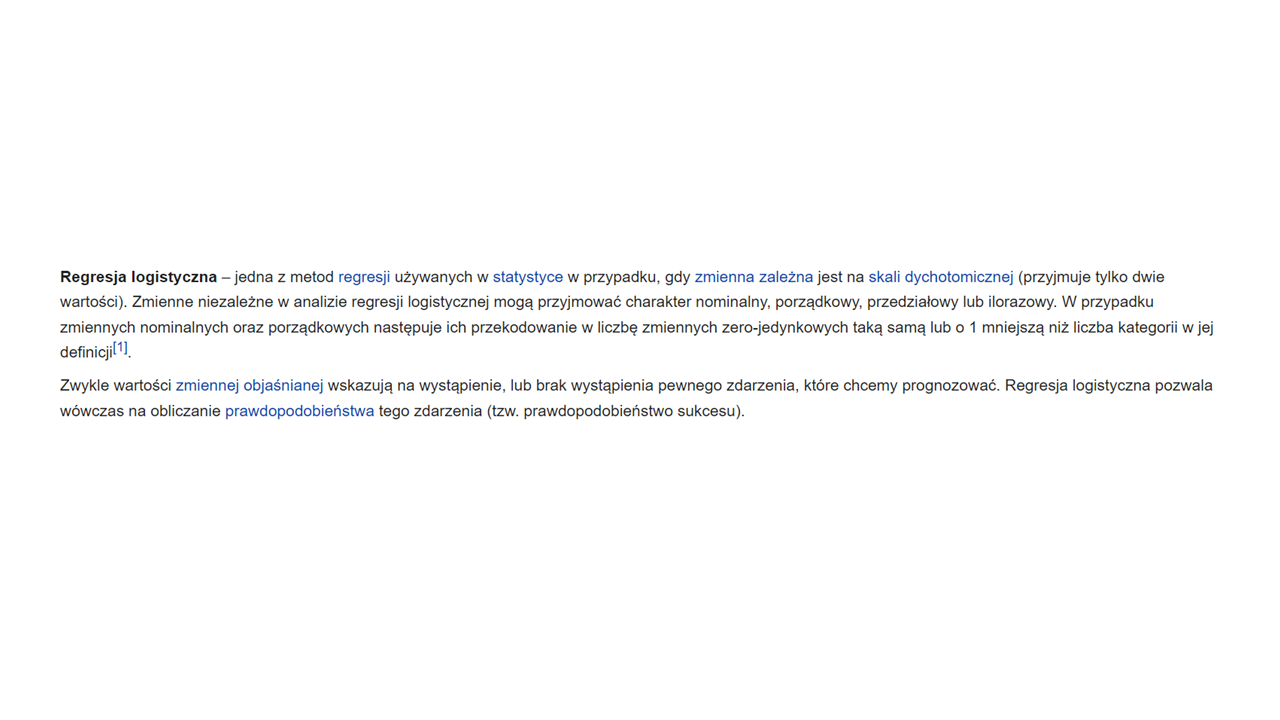

### wczytanie danych 

In [47]:
dane_raw = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/choroby_serca.txt", header = TRUE)
head(dane_raw)
nrow(dane_raw)
length(unique(dane_raw$id))
dane = dane_raw[, -1]
head(dane)

id chd age tobacco alcohol adiposity bmi    sbp ldl   famhist typea
1  2 1   63  0.01     2.06   28.61     overwe 144  4.41 0       55   
2  7 0   38  4.05     2.62   16.20     normal 142  3.38 0       59   
3 11 1   60  6.00    56.06   32.27     overwe 206  2.95 0       72   
4 13 0   17  0.00     0.00   10.05     normal 118  1.88 0       59   
5 14 0   15  0.00     0.97   17.21     normal 132  1.87 0       49   
6 17 0   49  7.50    34.49   22.00     overwe 120 15.33 0       60

[1] 462

[1] 462

chd age tobacco alcohol adiposity bmi    sbp ldl   famhist typea
1 1   63  0.01     2.06   28.61     overwe 144  4.41 0       55   
2 0   38  4.05     2.62   16.20     normal 142  3.38 0       59   
3 1   60  6.00    56.06   32.27     overwe 206  2.95 0       72   
4 0   17  0.00     0.00   10.05     normal 118  1.88 0       59   
5 0   15  0.00     0.97   17.21     normal 132  1.87 0       49   
6 0   49  7.50    34.49   22.00     overwe 120 15.33 0       60

### train test split

In [48]:
k = 1:324
uczacy = dane[k, ]
testowy = dane[-k,]

nrow(uczacy)
nrow(testowy)

[1] 324

[1] 138

Inny sposób na robienie train test split.

In [49]:
library(data.table)
cardio <- fread('http://theta.edu.pl/wp-content/uploads/2018/03/puls2.csv')
cardio$TetnoSpocz <- ifelse(cardio$TetnoSpocz =="Wysokie",1,0)

# 75% uczący, 25% testowy

sample <- sample(c(TRUE, FALSE), nrow(cardio), replace=TRUE, prob=c(0.75,0.25))
cardio_train  <- cardio[sample, ]
cardio_test   <- cardio[!sample, ]
head(cardio_train)
head(cardio_test)

TetnoSpocz Palacz Waga
1 0          1      51  
2 0          1      52  
3 0          1      57  
4 0          1      59  
5 0          1      60  
6 0          1      66

TetnoSpocz Palacz Waga
1 0          0      68  
2 0          0      68  
3 0          1      68  
4 0          1      75  
5 0          0      78  
6 0          0      82

### tworzenie modelu regresji logistycznej

In [50]:
model_glm = glm(chd ~ ., data = uczacy, family = binomial())
summary(model_glm)

# family = binomial() jest ważne dla regresji logistycznej


Call:
glm(formula = chd ~ ., family = binomial(), data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9585  -0.7536  -0.4738   0.7917   2.5219  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.248688   1.448680  -5.004 5.63e-07 ***
age          0.038197   0.014694   2.599  0.00934 ** 
tobacco      0.089316   0.031096   2.872  0.00408 ** 
alcohol     -0.003219   0.006669  -0.483  0.62936    
adiposity    0.025829   0.033944   0.761  0.44670    
bmiobese    -0.363034   0.581985  -0.624  0.53277    
bmioverwe   -0.466760   0.396408  -1.177  0.23901    
sbp          0.006309   0.007514   0.840  0.40116    
ldl          0.097374   0.069870   1.394  0.16343    
famhist      0.729383   0.353245   2.065  0.03894 *  
typea        0.044330   0.015533   2.854  0.00432 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 3

Model regresji logistycznej z uwzględnieniem interakcji.

In [51]:
model_interaction <- glm(TetnoSpocz ~ Palacz + Waga + Palacz*Waga, data = cardio_train, family = binomial())

summary(model_interaction)


Call:
glm(formula = TetnoSpocz ~ Palacz + Waga + Palacz * Waga, family = binomial(), 
    data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4860  -0.8914  -0.2110   0.7876   2.2610  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -5.07043    2.20308  -2.302   0.0214 *
Palacz      -19.79216   11.97670  -1.653   0.0984 .
Waga          0.05407    0.02507   2.157   0.0310 *
Palacz:Waga   0.22686    0.13559   1.673   0.0943 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 89.446  on 67  degrees of freedom
Residual deviance: 65.004  on 64  degrees of freedom
AIC: 73.004

Number of Fisher Scoring iterations: 7


In [52]:
# krokowa eliminacjia zmiennych

model_glm2 = glm(chd ~ . -alcohol -bmi -adiposity -sbp -ldl, data = uczacy, family = binomial())
summary(model_glm2)


Call:
glm(formula = chd ~ . - alcohol - bmi - adiposity - sbp - ldl, 
    family = binomial(), data = uczacy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9514  -0.7556  -0.4883   0.8418   2.4787  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.97205    1.05678  -5.651 1.59e-08 ***
age          0.05028    0.01204   4.175 2.98e-05 ***
tobacco      0.08572    0.03048   2.812  0.00492 ** 
famhist      0.76238    0.33992   2.243  0.02491 *  
typea        0.04271    0.01516   2.817  0.00484 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 382.87  on 323  degrees of freedom
Residual deviance: 316.11  on 319  degrees of freedom
AIC: 326.11

Number of Fisher Scoring iterations: 5


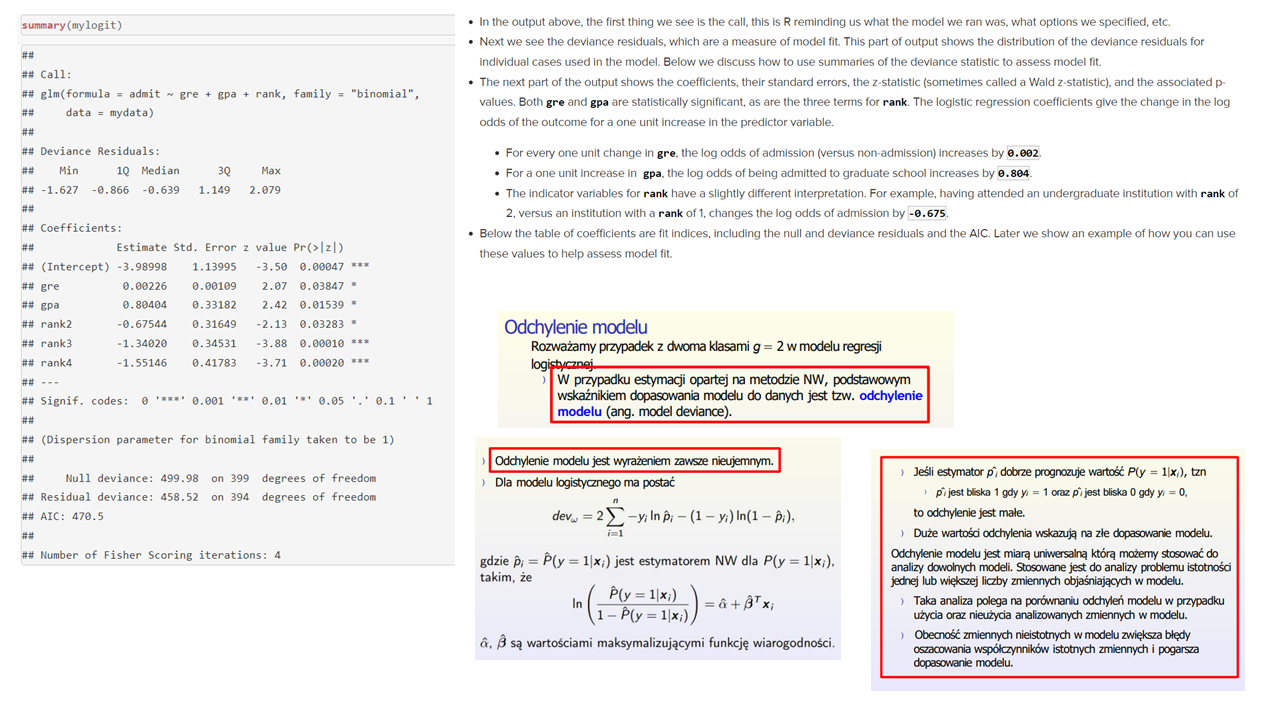

### predykcja

    predicted
true  0  1
   0 51 17
   1 33 37

[1] 36.23188

Group.1 x        
1 0       0.2500000
2 1       0.5285714

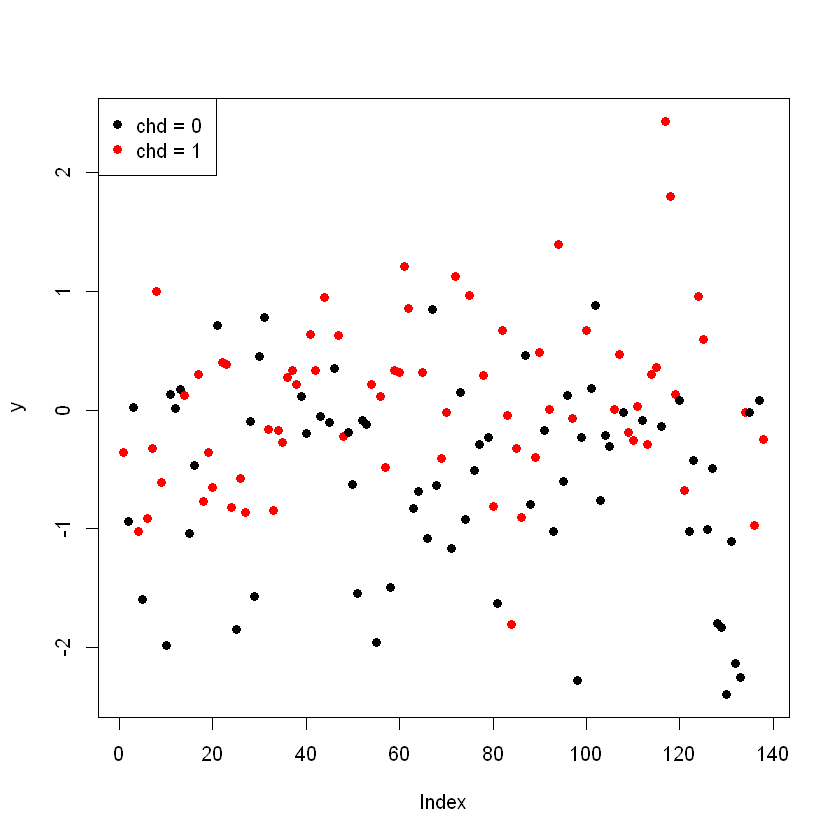

In [53]:
pred_values = predict(model_glm2, newdata = testowy, type = "response")

# aby uzyskać prawdopodobieństwo używamy type = "response"

# przekodowujemy prawdopodobieństwo na 0 i 1 (zawał, brak zawału)
pred_values[pred_values < 0.5] = 0
pred_values[pred_values >= 0.5] = 1


# tworzymy tabelę kontyngencji i obliczamy błąd predykcji
(T = table(true = testowy$chd, predicted = pred_values))  # robimy confusion matrix
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)


# wizualizacja klasyfikacji, tutaj nie używamt type = 'response' przy tworzeniu modelu
y = predict(model_glm2, newdata = testowy)
plot(y, pch = 19, col = testowy$chd + 1)
legend("topleft", c("chd = 0", "chd = 1"), pch = 19, col = c(1, 2))



aggregate(pred_values, by = list(testowy$chd), FUN = "mean")

# poprzez aggregate możemy zobaczyć średnie wartości dla czarnych i czerwonych punktów

# 7.Dyskryminacja_kwadratowa_QDA

### wczytywanie danych

In [54]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/dane_kosiarki-1.txt", header = TRUE)
head(dane)

dane1 = dane[dane$owner == 1, 1:2]
dane2 = dane[dane$owner == 2, 1:2]

# 1:2 ponieważ nie bieżemy pod uwage kolumny owner, bo nie jest nam już potrzebna

income lotsize owner
1 20.0    9.2    1    
2 28.5    8.4    1    
3 21.6   10.8    1    
4 20.5   10.4    1    
5 29.0   11.8    1    
6 36.7    9.6    1

### 'ręczne' przeprowadzanie QDA

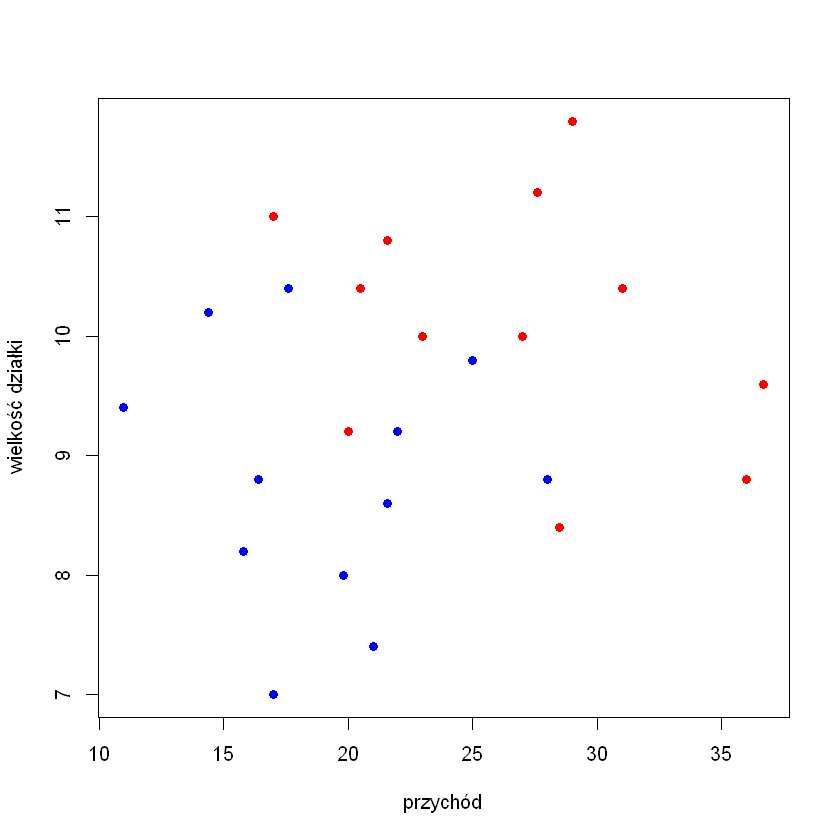

In [55]:
# ustawiamy sobie poprostu limity osi wykresu aby wszystko nam się na nim zmieściło -------------------------------

min_x = min(c(dane1$income, dane2$income))
min_y = min(c(dane1$lotsize, dane2$lotsize))

max_x = max(c(dane1$income, dane2$income))
max_y = max(c(dane1$lotsize, dane2$lotsize))

# ------------------------------------------------------------------------------------------------------------------

plot(dane1$income, dane1$lotsize, type = "p", 
     pch = 19, col = "red", xlab = "przychód", 
     ylab = "wielkość działki", xlim = c(min_x, max_x), 
     ylim = c(min_y, max_y))
points(dane2$income, dane2$lotsize, pch = 19, col = "blue")

In [56]:
# te zmienne potrzebujemy do wyznaczenia macierzy kowariancji

(m1 = colMeans(dane1))
m2 = colMeans(dane2)

(S1 = cov(dane1))
S2 = cov(dane2)

income  lotsize 
26.49167 10.13333

income    lotsize  
income  39.182652 -1.969697
lotsize -1.969697  1.020606

In [57]:
# liczymy macierze odwrotne

(invS1 = solve(S1))
invS2 = solve(S2)

pi1 = pi2 = 0.5

income     lotsize   
income  0.02826354 0.05454661
lotsize 0.05454661 1.08508105

In [58]:
# liczymy stałą k

k = .5*log(det(S1) / det(S2)) + .5*(t(m1)%*%invS1%*%m1 
                                    - t(m2)%*%invS2%*%m2)
k

[,1]    
[1,] 34.15698

In [59]:
x = seq(min_x, max_x, length = 100)
y = seq(min_y, max_y, length = 100)

X = as.data.frame(cbind(x, y))
colnames(X) = c("income", "lotsize")

head(X)

income   lotsize 
1 11.00000 7.000000
2 11.25960 7.048485
3 11.51919 7.096970
4 11.77879 7.145455
5 12.03838 7.193939
6 12.29798 7.242424

In [60]:
# tutaj robimy tak, że dla każdej wartości y (Var2) przypisujemy wszystkie wartości x (Var1)
# np. x1y1 x2y1 x3y1, x1y2, x2y2, x3y2, x1y3, x2y3, x3y3

np=1000
x = seq(min_x, max_x, length.out = np)
y = seq(min_y, max_y, length.out = np)
nd = expand.grid(x,y)
head(nd)
dim(nd)

Var1     Var2
1 11.00000 7   
2 11.02573 7   
3 11.05145 7   
4 11.07718 7   
5 11.10290 7   
6 11.12863 7

[1] 1000000       2

In [61]:
# to jest nasza funkcja dyskryminacyjna

fun_disk = function(X, pi1, pi2, m1, m2, S1, S2) {
    X = as.matrix(X, 1, 2)
    invS1 = solve(S1)
    invS2 = solve(S2)
    k = .5*log(det(S1) / det(S2)) + .5*(t(m1)%*%invS1%*%m1 - 
                                        t(m2)%*%invS2%*%m2)
    fun = log(pi2 / pi1) + X%*%(invS2%*%m2 - invS1%*%m1) -
          .5*X%*%(invS2 - invS1)%*%t(X) + k
    return(fun)
}

In [62]:
fun_disk(X[1,], pi1, pi2, m1, m2, S1, S2)  # przykładowy output funkcji

[,1]   
1 8.31347

In [63]:
# tworzymy pusty wektor q i zapełniamy go wartościami funckji dyskryminacyjnej

q = numeric(dim(nd)[1])
for (i in 1:dim(nd)[1]) {
 q[i] = fun_disk(as.matrix(nd[i,]), pi1, pi2, m1, m2, S1, S2)
}

head(q)
tail(q)

[1] 8.313470 8.308073 8.302665 8.297246 8.291816 8.286374

[1] -7.746404 -7.758350 -7.770308 -7.782277 -7.794257 -7.806249

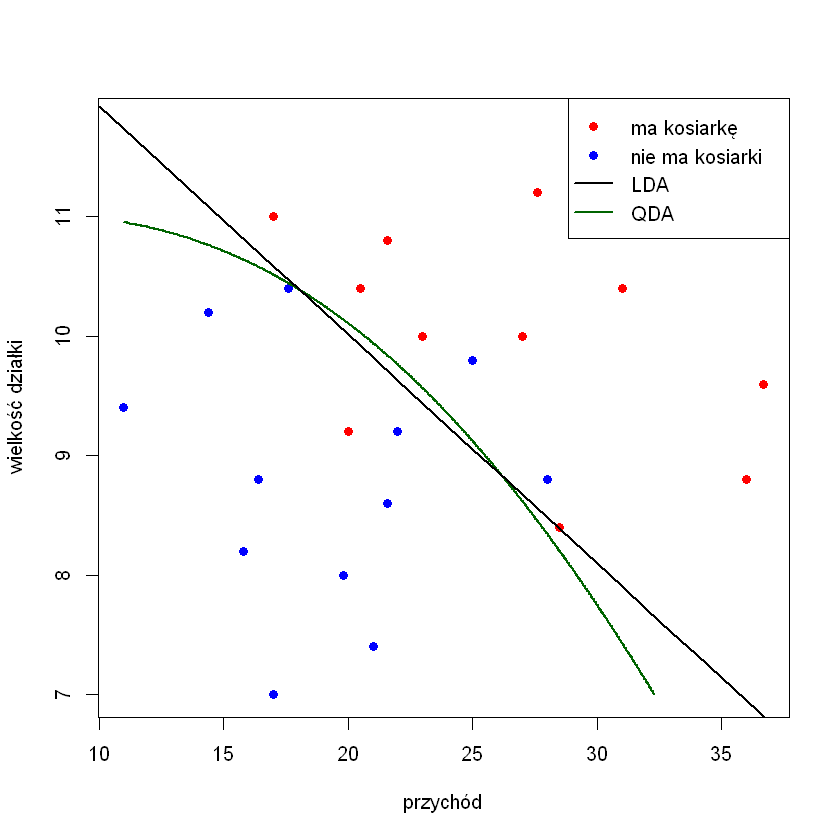

In [64]:
# zamieniamy zmienną ciągłą q na dychotomiczną (1,2) --------------------------------------------------------------
q2 = q
q2[q2 > 0] = 2
q2[q2 <=0] = 1
# -----------------------------------------------------------------------------------------------------------------

plot(dane1$income, dane1$lotsize, type = "p", 
     pch = 19, col = "red", xlab = "przychód", 
     ylab = "wielkość działki", xlim = c(min_x, max_x), 
     ylim = c(min_y, max_y))
points(dane2$income, dane2$lotsize, pch = 19, col = "blue")

contour(x, y, z = matrix(q2, nrow = np, ncol = np), 
        levels = c(1,2), add = TRUE, drawlabels = FALSE, 
        col='darkgreen', lwd = 2)
lines(10:40,21.73876/1.570369-0.3006909/1.570369*10:40,
      col='black', lwd = 2)
legend("topright", c("ma kosiarkę", "nie ma kosiarki", "LDA", "QDA"),
      col = c("red", "blue", "black", "darkgreen"), 
      pch = c(19, 19, NA, NA), lty = c(NA, NA, 1, 1), 
      lwd = c(1, 1, 2, 2))

### QDA z zastosowaniem gotowych funkcji

Wczytywanie danych

In [65]:
library(MASS)
data("Pima.te")
pima <- Pima.te
pima$type<-ifelse(pima$type=="Yes",1,0) # zamiana zmiennej objaśnianej na 0, 1
head(pima)

npreg glu bp skin bmi  ped   age type
1 6     148 72 35   33.6 0.627 50  1   
2 1      85 66 29   26.6 0.351 31  0   
3 1      89 66 23   28.1 0.167 21  0   
4 3      78 50 32   31.0 0.248 26  1   
5 2     197 70 45   30.5 0.158 53  1   
6 5     166 72 19   25.8 0.587 51  1

#### cross validation

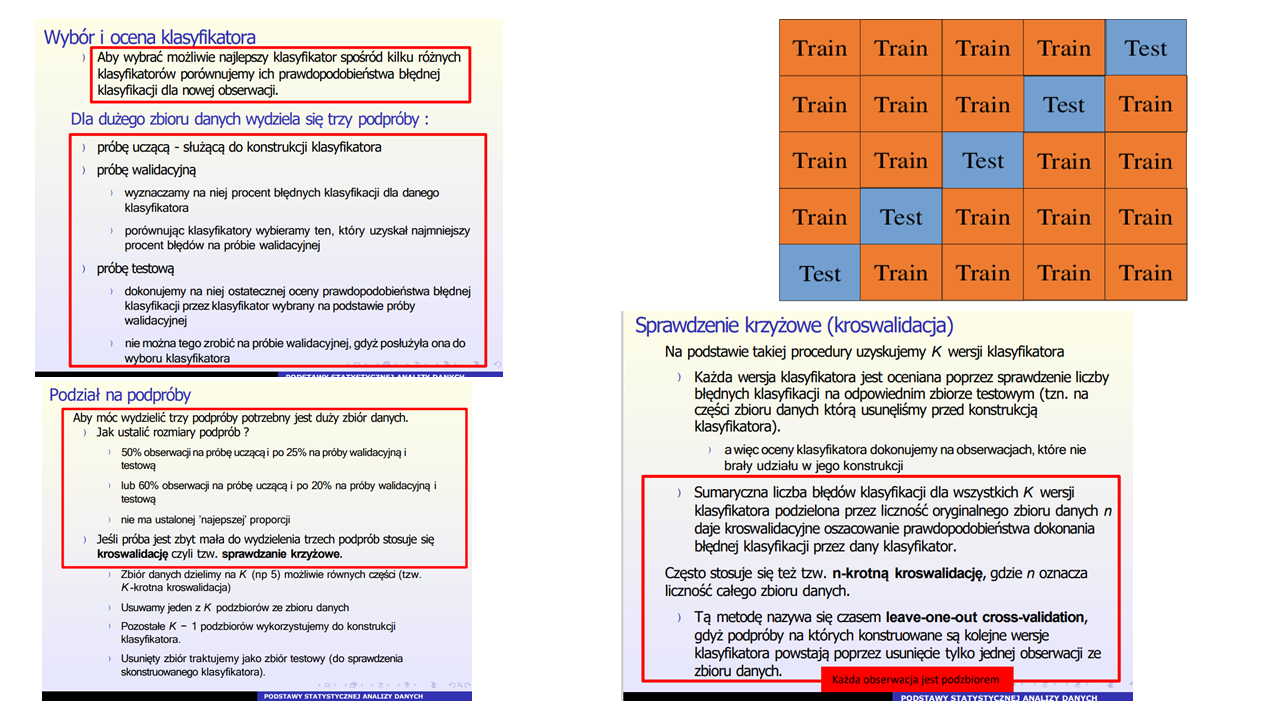

In [66]:
pima_qda_cv <- qda(type ~ npreg + glu + bp + skin + bmi + ped + age, data = pima, CV = TRUE)
summary(pima_qda_cv)

          Length Class  Mode   
class     332    factor numeric
posterior 664    -none- numeric
terms       3    terms  call   
call        4    -none- call   
xlevels     0    -none- list   

In [67]:
QDA_cv_actual <- pima$type
QDA_cv_predicted <- pima_qda_cv$class

QDA_cv_confusion_matrix <- table(QDA_cv_actual, QDA_cv_predicted, dnn = c("Actual", "Predicted"))

QDA_cv_prediction_error <- mean(QDA_cv_actual != QDA_cv_predicted)

QDA_cv_confusion_matrix
QDA_cv_prediction_error

      Predicted
Actual   0   1
     0 191  32
     1  42  67

[1] 0.2228916

#### metoda bootstrap

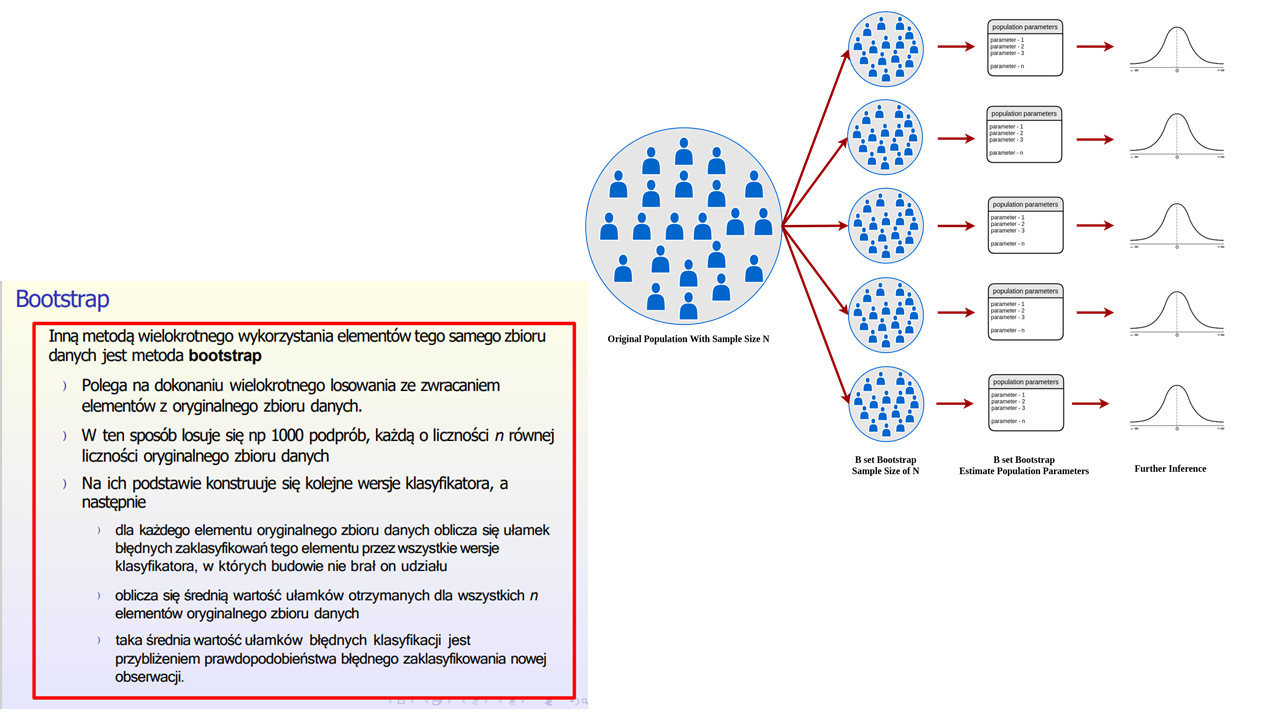

In [68]:
library(ipred)

mypredict.qda <- function(object, newdata)
  as.numeric(predict(object, newdata = newdata)$class)


QDA_boot_prediction_error <- errorest(type ~ ., data = pima, model = qda, estimator = 'boot', predict = mypredict.qda)

# tu poprostu wyznaczamy błąd predykcji modelu opartego o metodę bootstrap

### czułość i specyficzność

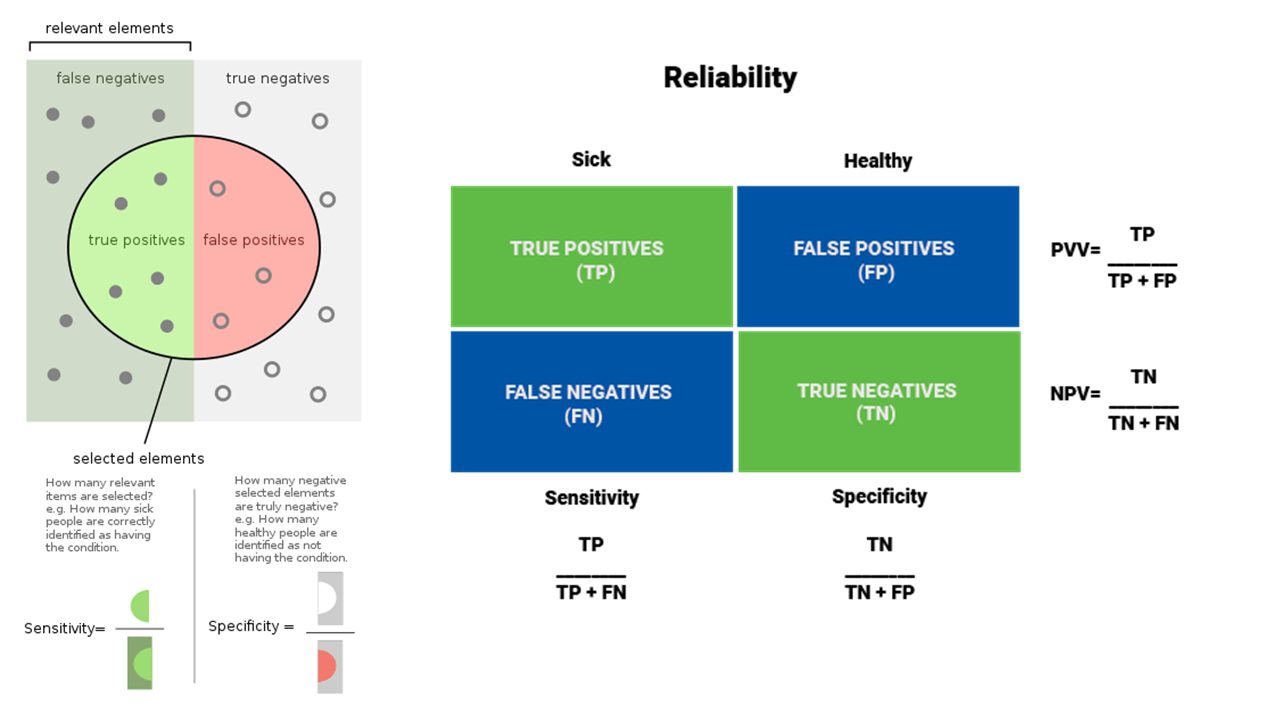

#### czułość (sensitivity)

Prawdopodobieństwo z jakim wykryjemy przypadek dodatni. Przykład: prawdopodobieństwo z jakim test na COVID-19 wykryje chorobę u osoby chorej.

#### specyficzność (specificity)

Prawdopodobieństwo z jakim przypadek ujemny nie zostanie wykryty. Przykład: prawdopodobieństwo z jakim test na COVID-19 da wynik ujemny u osoby zdrowej.

#### przykład

Jeśli czułość testu na COVID-19 jest bardzo wysoka ale jego specyficzność jest bardzo niska. To u każdego chorego poprawnie wykryje on chorobę, jednak u bardzo wielu zdrowych także da wynik dodatni.

#### Confusion matrix

In [69]:
QDA_cv_confusion_matrix <- table(QDA_cv_actual, QDA_cv_predicted, dnn = c("Actual", "Predicted"))
QDA_cv_confusion_matrix

      Predicted
Actual   0   1
     0 191  32
     1  42  67

In [70]:
QDA_TN <- QDA_cv_confusion_matrix[1]
QDA_FN <- QDA_cv_confusion_matrix[2]
QDA_FP <- QDA_cv_confusion_matrix[3]
QDA_TP <- QDA_cv_confusion_matrix[4]

QDA_sensitivity <- QDA_TP/(QDA_TP + QDA_FN)

QDA_specificity <- QDA_TN/(QDA_TN + QDA_FP)

QDA_sensitivity

QDA_specificity


[1] 0.6146789

[1] 0.8565022

### krzywa ROC oraz pole AUC

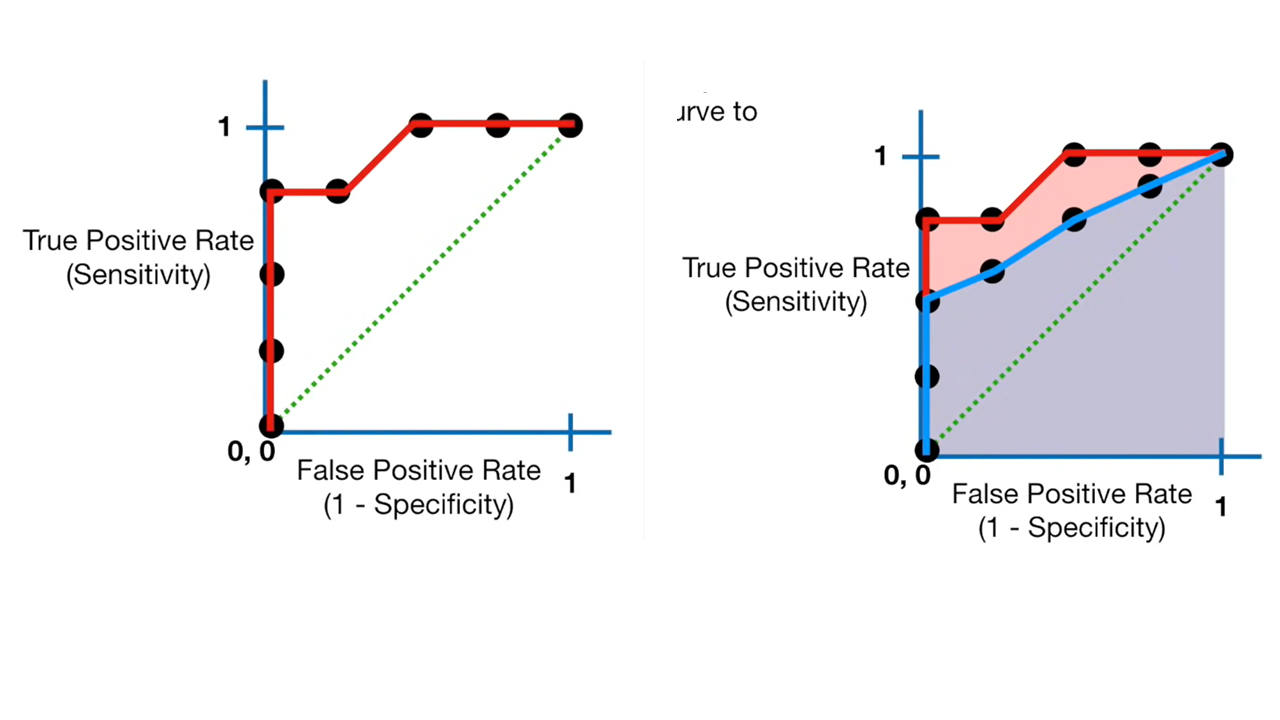

Każdy punkt na krzywej ROC odpowiada stosunkowi czułości do specyficzności dla danych parametrów danego modelu. Na bazie krzywej ROC możemy wybrać sobie najbardziej optymalne parametry naszego modelu. Pole pod wkyresem AUC pozwala na porównywać jakość różnych modeli do danej klasyfikacji. Im większy AUC tym model jest lepszy. Na przykład na wykresie po prawej, model czerwony jest lepszy dla tej klasyfikacji, ponieważ wykazuje większy AUC.

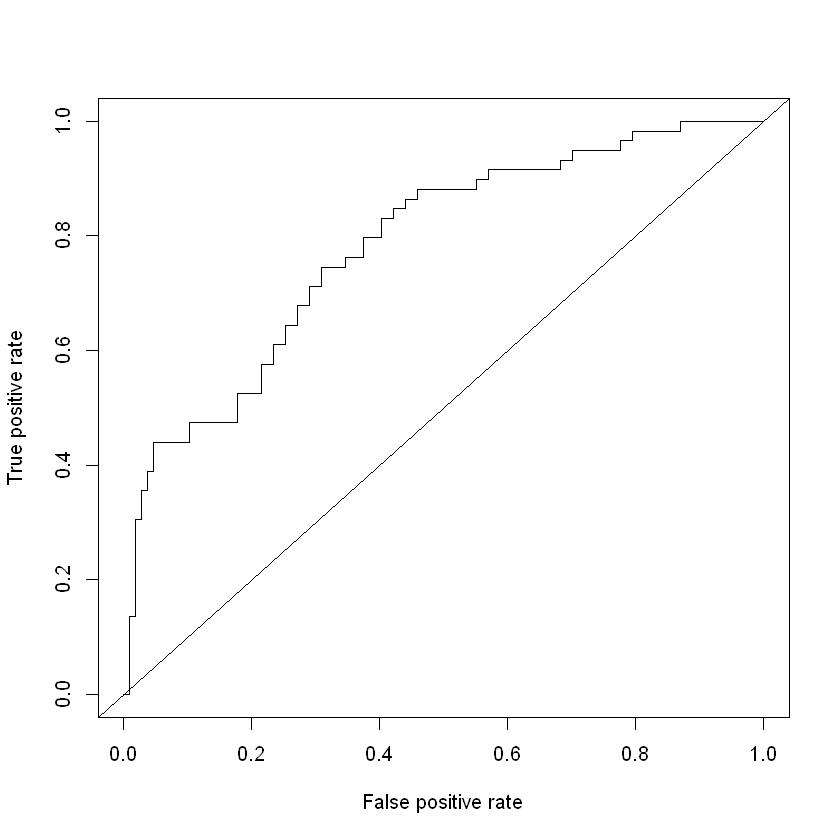

In [73]:
library(ROCR)


center <- floor(nrow(pima)/2)
pima_test <- pima[1:center,]
pima_train <- pima[center:nrow(pima),]


model_QDA <- qda(type ~ npreg + glu + bp + skin + bmi + ped + age, data = pima_train)

QDA_pred <- predict(model_QDA, newdata = pima_test)

QDA_pred_posteriori <- as.data.frame(QDA_pred$posterior)

QDA_pred <- prediction(QDA_pred_posteriori[,2], pima_test$type)

QDA_roc.perf = performance(QDA_pred, measure = "tpr", x.measure = "fpr")

plot(QDA_roc.perf, title = 'ROC')
abline(a=0, b= 1)

# 8.Drzewa_decyzyjne

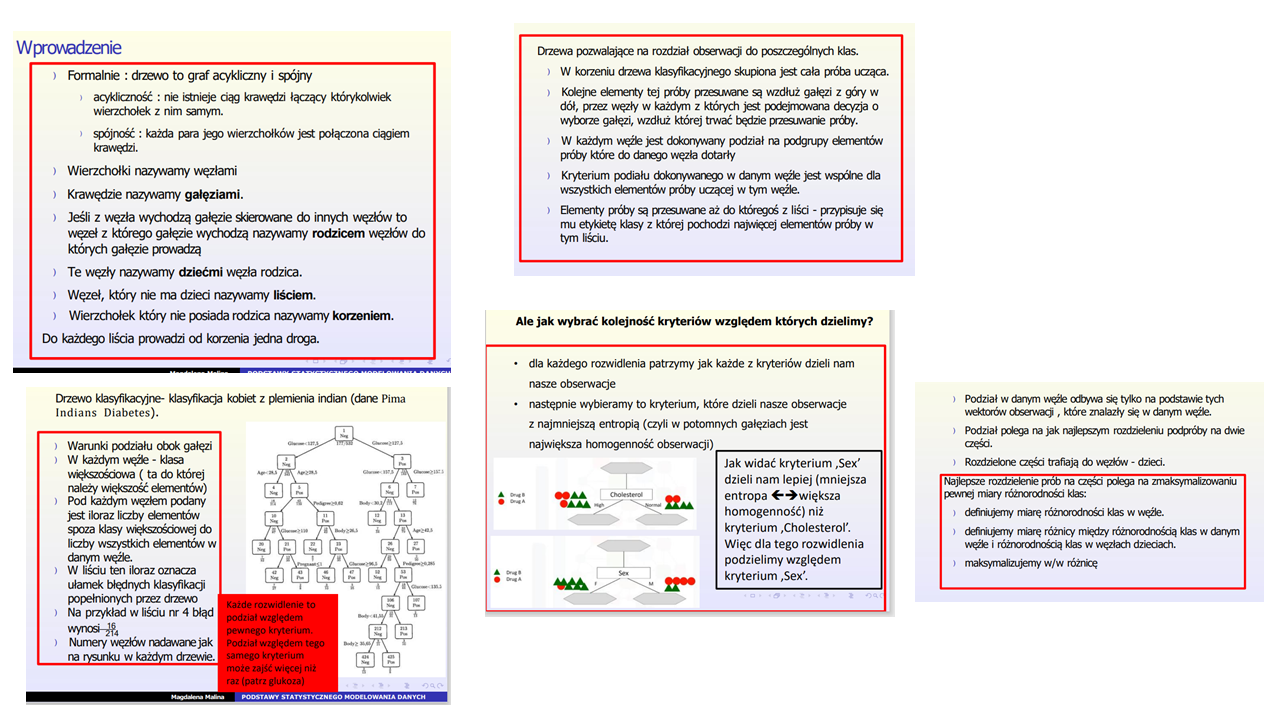

#### wczytywanie danych

In [74]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2018/03/choroby_serca.txt", header = TRUE)[, -1]
head(dane)
summary(dane)

chd age tobacco alcohol adiposity bmi    sbp ldl   famhist typea
1 1   63  0.01     2.06   28.61     overwe 144  4.41 0       55   
2 0   38  4.05     2.62   16.20     normal 142  3.38 0       59   
3 1   60  6.00    56.06   32.27     overwe 206  2.95 0       72   
4 0   17  0.00     0.00   10.05     normal 118  1.88 0       59   
5 0   15  0.00     0.97   17.21     normal 132  1.87 0       49   
6 0   49  7.50    34.49   22.00     overwe 120 15.33 0       60

      chd              age           tobacco           alcohol      
 Min.   :0.0000   Min.   :15.00   Min.   : 0.0000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:31.00   1st Qu.: 0.0525   1st Qu.:  0.51  
 Median :0.0000   Median :45.00   Median : 2.0000   Median :  7.51  
 Mean   :0.3463   Mean   :42.82   Mean   : 3.6356   Mean   : 17.04  
 3rd Qu.:1.0000   3rd Qu.:55.00   3rd Qu.: 5.5000   3rd Qu.: 23.89  
 Max.   :1.0000   Max.   :64.00   Max.   :31.2000   Max.   :147.19  
   adiposity         bmi           sbp             ldl            famhist      
 Min.   : 6.74   normal:200   Min.   :101.0   Min.   : 0.980   Min.   :0.0000  
 1st Qu.:19.77   obese : 73   1st Qu.:124.0   1st Qu.: 3.283   1st Qu.:0.0000  
 Median :26.11   overwe:189   Median :134.0   Median : 4.340   Median :0.0000  
 Mean   :25.41                Mean   :138.3   Mean   : 4.740   Mean   :0.4156  
 3rd Qu.:31.23                3rd Qu.:148.0   3rd Qu.: 5.790   3rd Qu.:1.0000  
 Max.   :42.49                Max.   

#### tworzenie wstępnego drzewa decyzyjnego

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
      binary source needs_compilation
rpart 4.1-15 4.1.19              TRUE



installing the source package 'rpart'

Warning message in install.packages("rpart"):
"installation of package 'rpart' had non-zero exit status"

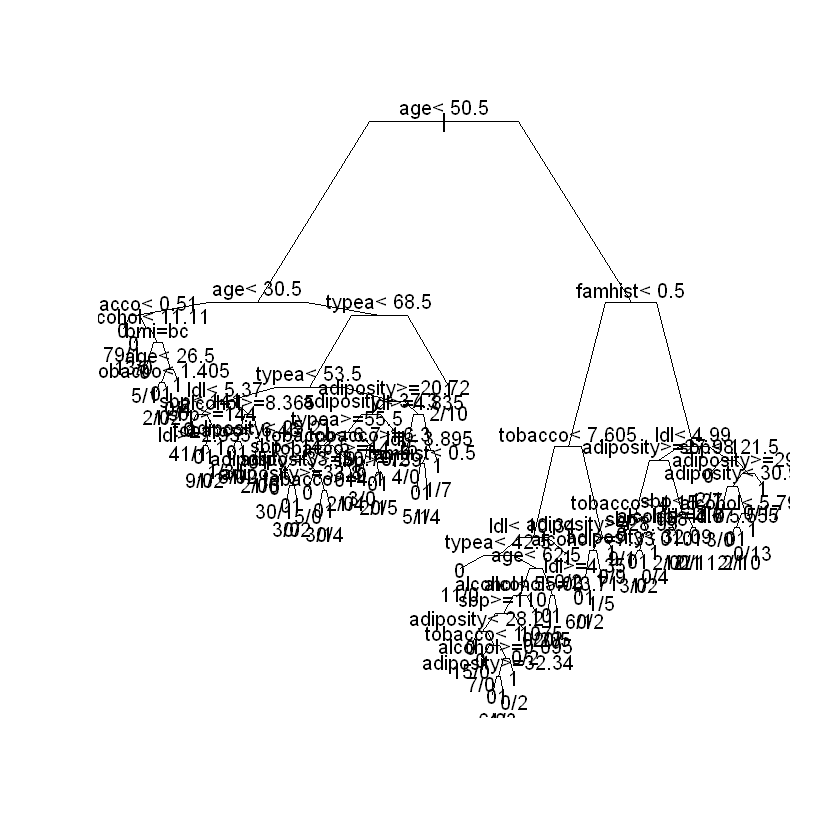

In [75]:
install.packages("rpart")
library(rpart)

drzewo = rpart(as.factor(chd) ~ ., data = dane, minsplit = 5, cp = 0.0001)
plot(drzewo,  branch = 0.4)  # nachylenie gałęzi drzewa
text(drzewo, use.n = TRUE)

# jak widać drzewo jest strasznie chaotyczne, więc współczynnik złożoności (cp) jest za mały

#### wyznaczanie optymalnej wartości współczynnika złożoności

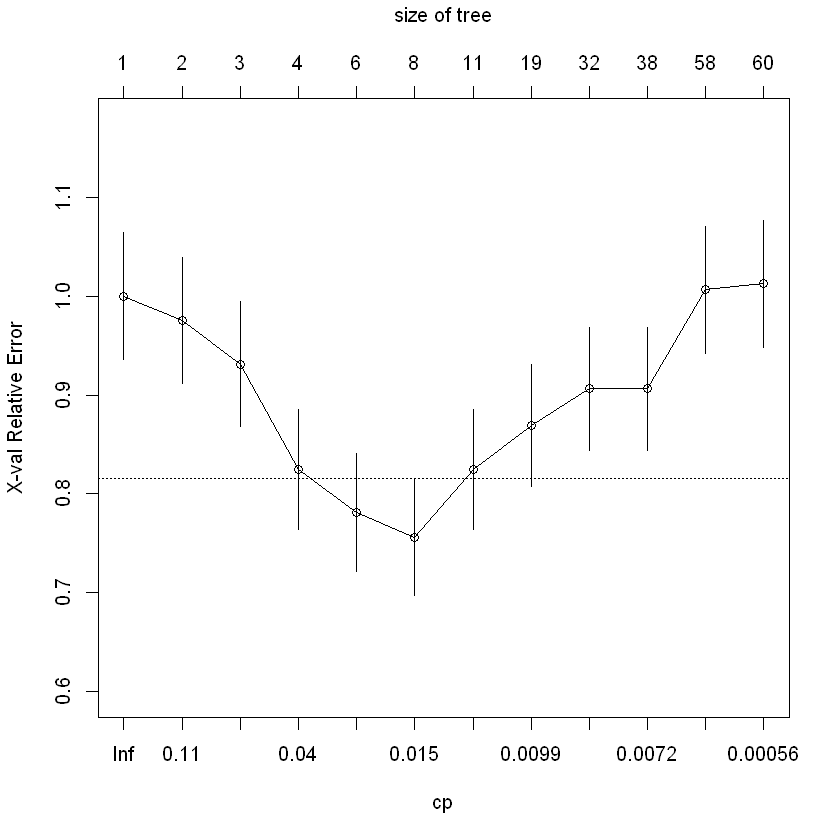

In [76]:
plotcp(drzewo)

In [77]:
optimum <- (0.04+0.015)/2
optimum
# to jest mniejwięcej najbardziej optymalna wartość

[1] 0.0275

#### tworzenie drzewa w oparciu o optymalny współczynnik złożoności

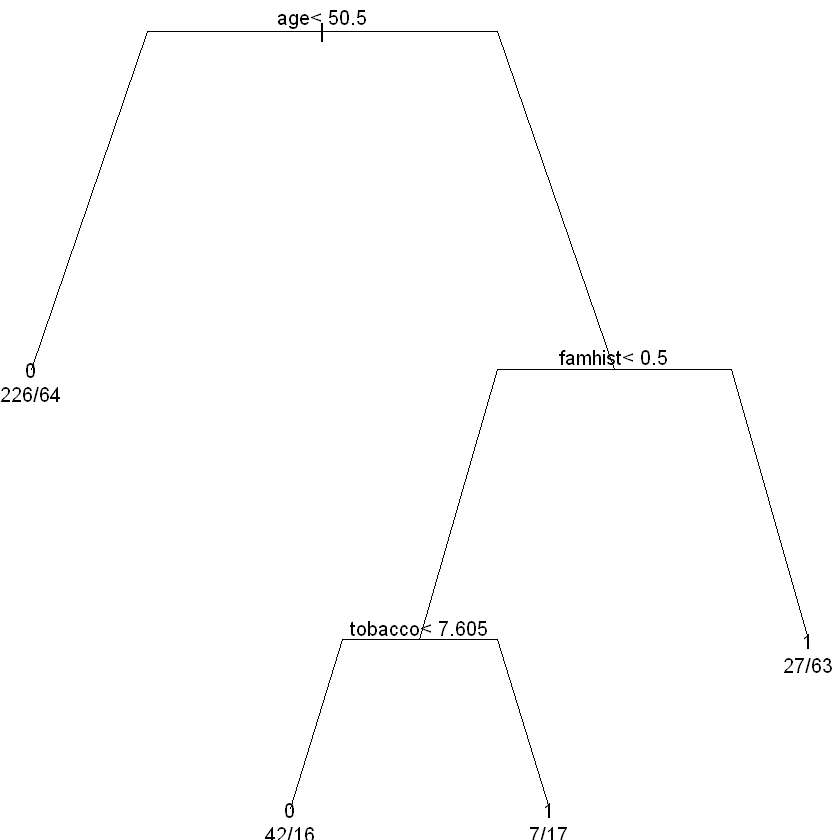

In [78]:
drzewo2 = rpart(as.factor(chd) ~ ., data = dane, minsplit = 5, cp = 0.0275)
par(mar=c(0, 0, 0, 0))
plot(drzewo2, branch = 0.6)
text(drzewo2, use.n = TRUE)

# drzewo z nowym współczynnikiem złożoności

#### porównywanie drzew metodą cross walicacji

In [79]:
# porównamy sobie nasze dwa poprzednie drzewa metodą cross-walidacji

n = nrow(dane)
wyniki = rep(0, n)   # definiujemy wektory zapełnione zerami
wyniki2 = rep(0, n)

for (i in 1:n) {
    train = dane[-i, ]  # to jest cross-walidacja (leave one out)
    test = dane[i, ]
    drzewo_1 = rpart(factor(chd) ~ ., data = train, minsplit = 5, cp = 0.0001)    # robimy drzewa
    drzewo_2 = rpart(as.factor(chd) ~ ., data = train, minsplit = 5, cp = 0.0275)
    pred_1 = predict(drzewo_1, newdata = test, type = "class")   # robimy predykcję
    pred_2 = predict(drzewo_2, newdata = test, type = "class")   
    if (pred_1 != factor(test$chd))  # jeśli mamy błędną klasyfikację to w wektorze, zamieniamy 0 na 1
        wyniki[i] = 1
    if (pred_2 != factor(test$chd))
        wyniki2[i] = 1
}

In [80]:
# sumujemy poprostu liczbę jedynek w naszych dwóch wektorach

sum(wyniki) / n * 100
sum(wyniki2) / n * 100

[1] 36.14719

[1] 26.19048

#### przycinanie drzewa

Nie zawsze trzeba robić nowe drzewo od zera, można poprostu przyciąć już istniejące drzewo w oparciu o optymalny współczynnik złożoności.

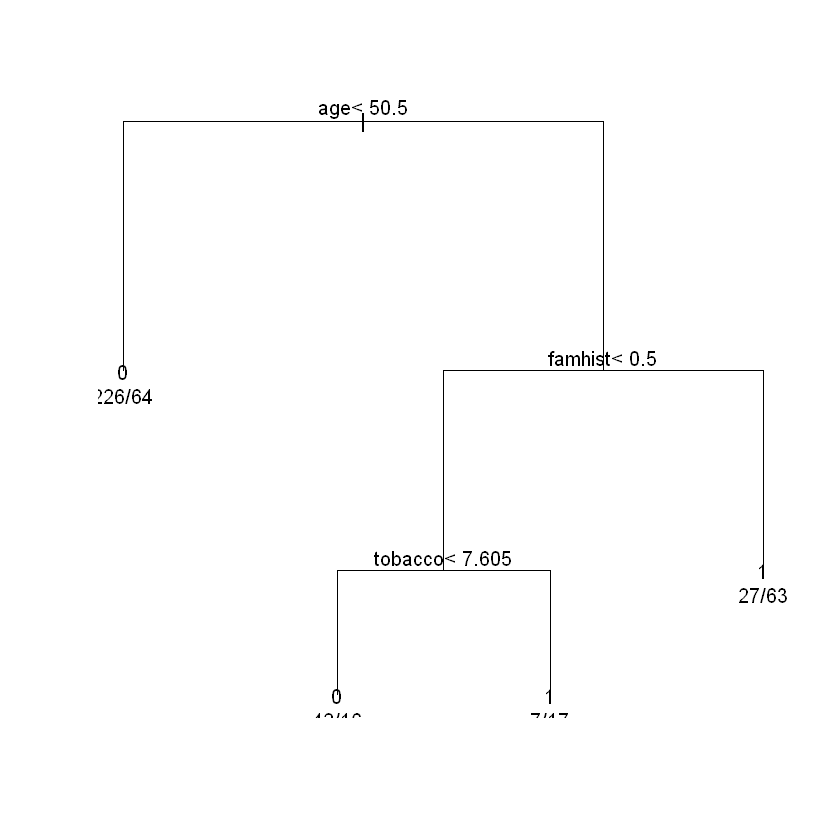

In [81]:
# wyniki pokazują, że cp 0.04 jest optymalny
# nie musimy tworzyć nowego drzewa
# możemy poprostu przyciąć już istniejące drzewo

drzewo_3 = prune.rpart(drzewo, cp = 0.04)
plot(drzewo_3)
text(drzewo_3, use.n = TRUE)